In [1]:
import os
import csv
import sys
import random
import numpy as np
import pandas as pd
from decimal import *
from Bio import SeqIO
import tensorflow as tf

## Load Data

<b>Load DNA Sequences dataset</b>

In [2]:
load_dna_seq = []

for folder_item in os.listdir("DNA (complete genome)"):
    for filename in os.listdir("DNA (complete genome)/" + folder_item):
        path = "DNA (complete genome)/" + folder_item + "/" + filename
        sequences = []
        seq_IDs = []
        for record in SeqIO.parse(path, "fasta"):
            sequences.append(record.seq)
            seq_IDs.append(record.id)
        
        load_dna_seq.append([filename, str(sequences[0]), folder_item])

origin_dna_df = pd.DataFrame(load_dna_seq, columns=["GenBank ID (filename)", "DNA Sequences", "Virus name"])
origin_dna_df

,GenBank ID (filename),DNA Sequences,Virus name
0,AC_000007.1.fasta,CATCATCATAATATACCTTATTTTGGATTGAAGCCAATATGATAAT...,Human Adenovirus
1,AC_000008.1.fasta,CATCATCAATAATATACCTTATTTTGGATTGAAGCCAATATGATAA...,Human Adenovirus
2,AC_000017.1.fasta,CATCATCAATAATATACCTTATTTTGGATTGAAGCCAATATGATAA...,Human Adenovirus
3,AC_000018.1.fasta,CTCTCTATTTAATATACCTTATAGATGGAATGGTGCCAATATGTAA...,Human Adenovirus
4,AC_000019.1.fasta,CATCATCAATAATATACCTTATAGATGGAATGGTGCCAATATGTAA...,Human Adenovirus
...,...,...,...
135,MH916806.1.fasta,CAGACTGCGACAGTTCGAGTTTGAAGCGAAAGCTAGCAACAGTATC...,Zika virus
136,MK241417.1.fasta,GACAGTTCGAGTTTGAAGCGAAAGCTAGCAACAGTATCAACAGGTT...,Zika virus
137,MN100039.1.fasta,GTGTGAATCAGACTGCGACAGTTCGAGTTTGAAGCGAAAGCTAGCA...,Zika virus
138,MN124090.1.fasta,TGTGAATCAGACTGCGACAGTTCGAGTTTGAAGCGAAAGCTAGCAA...,Zika virus


<b>Load Protein sequences dataset</b>

In [3]:
load_protein_seq = []

for folder_item in os.listdir("Protein"):
    for filename in os.listdir("Protein/" + folder_item):
        path = "Protein/" + folder_item + "/" + filename
        sequences = []
        seq_IDs = []
        for record in SeqIO.parse(path, "fasta"):
            sequences.append(record.seq)
            seq_IDs.append(record.id)
        
        load_protein_seq.append([filename, sequences[0], folder_item])

origin_protein_df = pd.DataFrame(load_protein_seq, columns=["GenBank ID (filename)", "Protein Sequences", "Virus name"])
origin_protein_df

,GenBank ID (filename),Protein Sequences,Virus name
0,AC_000007.1.txt,"(M, R, H, I, I, C, H, G, G, V, I, T, E, E, M, ...",Human Adenovirus
1,AC_000008.1.txt,"(M, R, H, I, I, C, H, G, G, V, I, T, E, E, M, ...",Human Adenovirus
2,AC_000017.1.txt,"(M, R, H, I, I, C, H, G, G, V, I, T, E, E, M, ...",Human Adenovirus
3,AC_000018.1.txt,"(M, R, H, L, R, F, L, P, Q, E, I, I, F, S, E, ...",Human Adenovirus
4,AC_000019.1.txt,"(M, R, D, L, R, F, L, P, Q, E, I, I, S, A, E, ...",Human Adenovirus
...,...,...,...
135,MH916806.1.txt,"(M, K, N, P, K, K, K, S, G, G, F, R, I, V, N, ...",Zika virus
136,MK241417.1.txt,"(M, K, N, P, K, K, K, S, G, G, F, R, I, V, N, ...",Zika virus
137,MN100039.1.txt,"(M, K, N, P, K, K, K, S, G, G, F, R, I, V, N, ...",Zika virus
138,MN124090.1.txt,"(M, K, N, P, K, K, K, S, G, G, F, R, I, V, N, ...",Zika virus


## Sequence Encoding

In [4]:
def dna_index_encoding(Text, n):
    dna_token = {"AAA": 1, "AAC": 2, "AAT": 3, "AAG": 4, "ACA": 5, "ACC": 6, "ACT": 7, "ACG": 8, "ATA": 9, "ATC": 10, "ATT": 11, "ATG": 12, "AGA": 13, "AGC": 14, "AGT": 15, "AGG": 16,
                "CAA": 17, "CAC": 18, "CAT": 19, "CAG": 20, "CCA": 21, "CCC": 22, "CCT": 23, "CCG": 24, "CTA": 25, "CTC": 26, "CTT": 27, "CTG": 28, "CGA": 29, "CGC": 30, "CGT": 31, "CGG": 32,
                "GAA": 33, "GAC": 34, "GAT": 35, "GAG": 36, "GCA": 37, "GCC": 38, "GCT": 39, "GCG": 40, "GTA": 41, "GTC": 42, "GTT": 43, "GTG": 44, "GGA": 45, "GGC": 46, "GGT": 47, "GGG": 48,
                "TAA": 49, "TAC": 50, "TAT": 51, "TAG": 52, "TCA": 53, "TCC": 54, "TCT": 55, "TCG": 56, "TTA": 57, "TTC": 58, "TTG": 59, "TGA": 60, "TGC": 61, "TGT": 62, "TGG": 63, "TTT": 64}

    encoding_sequence = []
    l=len(Text)

    for i in range (l-n+1):
        Pattern = Text[i:i+n]
        try:
            index = dna_token[Pattern]
            encoding_sequence.append(index)
        except KeyError as e:
            print("Unknown sequence:", e)
            continue

    return encoding_sequence

In [5]:
encoding_result = []
encoding_filename = []
encoding_label = []

for folder_item in os.listdir("DNA (complete genome)"):
    for filename in os.listdir("DNA (complete genome)/" + folder_item):
        path = "DNA (complete genome)/" + folder_item + "/" + filename
        sequences = []
        seq_IDs = []
        print(f"Opening: {folder_item}/{filename}")
        for record in SeqIO.parse(path, "fasta"):
            sequences.append(record.seq)
            seq_IDs.append(record.id)
        
        seq_arr = dna_index_encoding(str(sequences[0]), 3)
        encoding_result.append(seq_arr)
        encoding_filename.append(filename)
        encoding_label.append(folder_item)

Opening: Human Adenovirus/AC_000007.1.fasta
Opening: Human Adenovirus/AC_000008.1.fasta
Opening: Human Adenovirus/AC_000017.1.fasta
Opening: Human Adenovirus/AC_000018.1.fasta
Opening: Human Adenovirus/AC_000019.1.fasta
Opening: Human Adenovirus/JF799911.1.fasta
Opening: Human Adenovirus/JN226746.1.fasta
Opening: Human Adenovirus/MK241690.1.fasta
Opening: Human Adenovirus/MK357714.1.fasta
Opening: Human Adenovirus/MK357715.1.fasta
Opening: Human Adenovirus/MT113942.1.fasta
Opening: Human Adenovirus/MT113944.1.fasta
Opening: Human Adenovirus/NC_001405.1.fasta
Opening: Human Adenovirus/NC_001454.1.fasta
Opening: Human Adenovirus/NC_001460.1.fasta
Opening: Human Adenovirus/NC_003266.2.fasta
Opening: Human Adenovirus/NC_010956.1.fasta
Opening: Human Adenovirus/NC_011202.1.fasta
Opening: Human Adenovirus/NC_011203.1.fasta
Opening: Human Adenovirus/OL450401.1.fasta
Opening: MERS-CoV/KF958702.1.fasta
Opening: MERS-CoV/KT806047.1.fasta
Opening: MERS-CoV/KU710265.1.fasta
Opening: MERS-CoV/KX034

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad sequences for filling the blank arrays
padded = pad_sequences(encoding_result, padding='post', truncating='post')
padded

array([[19, 10, 53, ...,  0,  0,  0],
       [19, 10, 53, ...,  0,  0,  0],
       [19, 10, 53, ..., 60, 35, 12],
       ...,
       [44, 62, 44, ...,  0,  0,  0],
       [62, 44, 60, ...,  0,  0,  0],
       [36, 15, 43, ...,  0,  0,  0]])

In [7]:
encoding_df1 = pd.DataFrame(encoding_filename, columns=["GenBank ID"])
encoding_df2 = pd.DataFrame(padded)
encoding_df3 = pd.DataFrame(encoding_label, columns=["Virus name"])

encoding_df = pd.concat([encoding_df1, encoding_df2, encoding_df3], axis=1)
encoding_df

,GenBank ID,0,1,2,3,4,5,6,7,8,...,35990,35991,35992,35993,35994,35995,35996,35997,35998,Virus name
0,AC_000007.1.fasta,19,10,53,19,10,53,19,9,49,...,0,0,0,0,0,0,0,0,0,Human Adenovirus
1,AC_000008.1.fasta,19,10,53,19,10,53,17,3,9,...,0,0,0,0,0,0,0,0,0,Human Adenovirus
2,AC_000017.1.fasta,19,10,53,19,10,53,17,3,9,...,51,11,59,60,35,12,60,35,12,Human Adenovirus
3,AC_000018.1.fasta,26,55,26,55,25,51,11,64,57,...,0,0,0,0,0,0,0,0,0,Human Adenovirus
4,AC_000019.1.fasta,19,10,53,19,10,53,17,3,9,...,0,0,0,0,0,0,0,0,0,Human Adenovirus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,MH916806.1.fasta,20,13,34,7,28,61,40,29,34,...,0,0,0,0,0,0,0,0,0,Zika virus
136,MK241417.1.fasta,34,5,20,15,43,58,56,29,36,...,0,0,0,0,0,0,0,0,0,Zika virus
137,MN100039.1.fasta,44,62,44,60,33,3,10,53,20,...,0,0,0,0,0,0,0,0,0,Zika virus
138,MN124090.1.fasta,62,44,60,33,3,10,53,20,13,...,0,0,0,0,0,0,0,0,0,Zika virus


In [8]:
# save table for qualification
encoding_df.to_csv("1.Sequence Encoding.csv")

## N-mers Frequency

In [9]:
# N-mers Frequency function
def n_mers(Text, n):
    freq = {}
    l=len(Text)
    for i in range (l-n+1):
        Pattern = Text[i:i+n]
        if Pattern not in freq:
            freq[Pattern] = 1 # if a pattern found is not already  in the dictionary freq{}, it is assigned a value of 1 and added to the list
        else:
            freq[Pattern] +=1 # however, if the pattern is already in the dictionary, its value should go up by 1 (so if it has been found, it is initially given a pattern of 1, and then this adds another 1 if it is found again
    return freq

In [10]:
nmers_result = []

for folder_item in os.listdir("DNA (complete genome)"):
    for filename in os.listdir("DNA (complete genome)/" + folder_item):
        path = "DNA (complete genome)/" + folder_item + "/" + filename
        sequences = []
        seq_IDs = []
        print(f"Opening: {folder_item}/{filename}")
        for record in SeqIO.parse(path, "fasta"):
            sequences.append(record.seq)
            seq_IDs.append(record.id)
        
        result = n_mers(str(sequences[0]), 3)
        result.update({"GenBank ID": filename, "Virus name": folder_item})
        nmers_result.append(result)

Opening: Human Adenovirus/AC_000007.1.fasta
Opening: Human Adenovirus/AC_000008.1.fasta
Opening: Human Adenovirus/AC_000017.1.fasta
Opening: Human Adenovirus/AC_000018.1.fasta
Opening: Human Adenovirus/AC_000019.1.fasta
Opening: Human Adenovirus/JF799911.1.fasta
Opening: Human Adenovirus/JN226746.1.fasta
Opening: Human Adenovirus/MK241690.1.fasta
Opening: Human Adenovirus/MK357714.1.fasta
Opening: Human Adenovirus/MK357715.1.fasta
Opening: Human Adenovirus/MT113942.1.fasta
Opening: Human Adenovirus/MT113944.1.fasta
Opening: Human Adenovirus/NC_001405.1.fasta
Opening: Human Adenovirus/NC_001454.1.fasta
Opening: Human Adenovirus/NC_001460.1.fasta
Opening: Human Adenovirus/NC_003266.2.fasta
Opening: Human Adenovirus/NC_010956.1.fasta
Opening: Human Adenovirus/NC_011202.1.fasta
Opening: Human Adenovirus/NC_011203.1.fasta
Opening: Human Adenovirus/OL450401.1.fasta
Opening: MERS-CoV/KF958702.1.fasta
Opening: MERS-CoV/KT806047.1.fasta
Opening: MERS-CoV/KU710265.1.fasta
Opening: MERS-CoV/KX034

In [11]:
dna_ordered_list = ["AAA", "AAC", "AAT", "AAG", "ACA", "ACC", "ACT", "ACG", "ATA", "ATC",
                    "ATT", "ATG", "AGA", "AGC", "AGT", "AGG", "CAA", "CAC", "CAT", "CAG",
                    "CCA", "CCC", "CCT", "CCG", "CTA", "CTC", "CTT", "CTG", "CGA", "CGC",
                    "CGT", "CGG", "GAA", "GAC", "GAT", "GAG", "GCA", "GCC", "GCT", "GCG",
                    "GTA", "GTC", "GTT", "GTG", "GGA", "GGC", "GGT", "GGG", "TAA", "TAC",
                    "TAT", "TAG", "TCA", "TCC", "TCT", "TCG", "TTA", "TTC", "TTG", "TGA",
                    "TGC", "TGT", "TGG", "TTT"]

In [12]:
nmers_df = pd.DataFrame(nmers_result, columns=["GenBank ID"] + dna_ordered_list + ["Virus name"])
nmers_df

,GenBank ID,AAA,AAC,AAT,AAG,ACA,ACC,ACT,ACG,ATA,...,TCG,TTA,TTC,TTG,TGA,TGC,TGT,TGG,TTT,Virus name
0,AC_000007.1.fasta,801,608,353,556,568,715,455,453,317,...,343,381,466,561,549,708,474,708,647,Human Adenovirus
1,AC_000008.1.fasta,782,590,368,570,566,702,469,459,330,...,340,368,461,554,538,701,466,705,627,Human Adenovirus
2,AC_000017.1.fasta,764,603,360,574,580,693,467,457,324,...,347,404,460,555,526,708,465,710,665,Human Adenovirus
3,AC_000018.1.fasta,754,575,512,569,642,636,535,312,415,...,351,438,569,547,601,672,473,738,692,Human Adenovirus
4,AC_000019.1.fasta,900,596,561,605,634,568,522,347,408,...,345,478,652,605,592,630,524,720,786,Human Adenovirus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,MH916806.1.fasta,237,161,126,278,233,145,157,84,105,...,58,67,111,205,223,170,162,389,107,Zika virus
136,MK241417.1.fasta,236,159,127,279,233,145,153,83,105,...,58,66,108,205,223,166,163,390,109,Zika virus
137,MN100039.1.fasta,244,162,131,280,234,146,160,85,106,...,60,66,115,208,225,166,165,393,110,Zika virus
138,MN124090.1.fasta,242,162,129,280,234,146,160,85,105,...,60,66,115,208,227,165,166,393,110,Zika virus


In [13]:
# save table for qualification
nmers_df.to_csv("2.N-mers Frequency.csv")

## Conjoint Triad

In [14]:
# Generating vector space (7*7*7)
def VS(rang):
    V = []
    for i in range(1,rang):
        for j in range(1,rang):
            for k in range(1,rang):
                tmp = "VS"+str(k) + str(j) + str(i)
                V.append(tmp)
    return V

In [15]:
# calculating conjoint triad for input sequence
def frequency(seq):
    frequency = []
    for i in range(0, (len(seq) - 3)):
        subSeq = seq[i:i+3]
        tmp = "VS"
        for j in range(0,3):
            if((subSeq[j] == 'A') or (subSeq[j] == 'G') or (subSeq[j] == 'V')):
                tmp += "1"
            elif((subSeq[j] == 'I') or (subSeq[j] == 'L') or (subSeq[j] == 'F') or (subSeq[j] == 'P')):
                tmp += "2"
            elif((subSeq[j] == 'Y') or (subSeq[j] == 'M') or (subSeq[j] == 'T') or (subSeq[j] == 'S')):
                tmp += "3"
            elif((subSeq[j] == 'H') or (subSeq[j] == 'N') or (subSeq[j] == 'Q') or (subSeq[j] == 'W')):
                tmp += "4"
            elif((subSeq[j] == 'R') or (subSeq[j] == 'K')):
                tmp += "5"
            elif((subSeq[j] == 'D') or (subSeq[j] == 'E')):
                tmp += "6"
            elif((subSeq[j] == 'C')):
                tmp += "7"
        frequency.append(tmp)
    return frequency

In [16]:
# Creating frequency_dictionary, and calaculate frequency for eaech conjoint triad
def freq_dict(V, freq):
    frequency_dictionary = {}
    for i in range(0, len(V)):
        key = V[i]
        frequency_dictionary[key] = 0

    for i in range(0, len(freq)):
        frequency_dictionary[freq[i]] = frequency_dictionary[freq[i]]+1

    return frequency_dictionary

In [17]:
# Export the output to .csv file
def output_to_csv(seq_ID, frequency_dict):

    # Each row in csv file [ seqID, frequencies ]
    data = [seq_ID]
    for key, value in frequency_dict.items():
        data.append(value)

    with open('conjoint_triad.csv', 'a') as csvfile:
        conjointTriad = csv.writer(csvfile)
        conjointTriad.writerow(data)

In [18]:
# Reading sequences from fasta file.
def fasta_input():
    print("Enter path of .fasta file : ", end='')
    path = input()
    sequences = []
    seq_IDs = []
    for record in SeqIO.parse(path, "fasta"):
        sequences.append(record.seq)
        seq_IDs.append(record.id)
    return sequences, seq_IDs

In [19]:
def conjoint_triad(sequences, seq_IDs):
    # Truncating .csv file
    filename = "conjoint_triad.csv"
    f = open(filename, "w+")
    f.close()
    # reading input file
    #sequences, seq_IDs = fasta_input()
    # Creating vector space
    v = VS(8)

    #writing vector space as header in the csv file
    header = ["GenBank ID"]
    for i in range(0, len(v)):
        header.append(v[i])
    with open(filename, "a") as headingcsv:
        headerwriter = csv.writer(headingcsv)
        headerwriter.writerow(header)
    conjoint_triad.vs_header = header

    # calculating conjoint_triad for each sequence
    for i in range(0, len(sequences)):
        fi = frequency(sequences[i])
        freqDict = freq_dict(v, fi)
        output_to_csv(seq_IDs[i], freqDict)

    # replace double \n with single \n
    file = open("conjoint_triad.csv", "r")
    csv_data = file.read()
    csv_data = csv_data.replace("\n\n", "\n")
    file.close()
    
    file = open("conjoint_triad.csv", "w+")
    file.write(csv_data)
    file.close()

In [20]:
conjT_df = [] # clear cache variable

for folder_item in os.listdir("Protein"):
    for filename in os.listdir("Protein/" + folder_item):
        path = "Protein/" + folder_item + "/" + filename
        sequences = []
        seq_IDs = []
        for record in SeqIO.parse(path, "fasta"):
            sequences.append(record.seq)
            seq_IDs.append(record.id)
        
        print(f"Opening: {folder_item}/{filename}")
        conjoint_triad(sequences, seq_IDs)
        
        header = conjoint_triad.vs_header + ['Virus name']
        data = pd.read_csv("conjoint_triad.csv", index_col=0)
        conj_t = list(data.sum())
        
        try:
            conjT_df.loc[len(conjT_df.index)] = [filename] + conj_t + [folder_item]
        except:
            conjT_df = pd.DataFrame(columns=header)
            conjT_df.loc[len(conjT_df.index)] = [filename] + conj_t + [folder_item]

        os.remove("conjoint_triad.csv")

print("Done !")

Opening: Human Adenovirus/AC_000007.1.txt
Opening: Human Adenovirus/AC_000008.1.txt
Opening: Human Adenovirus/AC_000017.1.txt
Opening: Human Adenovirus/AC_000018.1.txt
Opening: Human Adenovirus/AC_000019.1.txt
Opening: Human Adenovirus/JF799911.1.txt
Opening: Human Adenovirus/JN226746.1.txt
Opening: Human Adenovirus/MK241690.1.txt
Opening: Human Adenovirus/MK357714.1.txt
Opening: Human Adenovirus/MK357715.1.txt
Opening: Human Adenovirus/MT113942.1.txt
Opening: Human Adenovirus/MT113944.1.txt
Opening: Human Adenovirus/NC_001405.1.txt
Opening: Human Adenovirus/NC_001454.1.txt
Opening: Human Adenovirus/NC_001460.1.txt
Opening: Human Adenovirus/NC_003266.2.txt
Opening: Human Adenovirus/NC_010956.1.txt
Opening: Human Adenovirus/NC_011202.1.txt
Opening: Human Adenovirus/NC_011203.1.txt
Opening: Human Adenovirus/OL450401.1.txt
Opening: MERS-CoV/KF958702.1.txt
Opening: MERS-CoV/KT806047.1.txt
Opening: MERS-CoV/KU710265.1.txt
Opening: MERS-CoV/KX034096.1.txt
Opening: MERS-CoV/KX034099.1.txt
Ope

In [21]:
conjT_df

,GenBank ID,VS111,VS211,VS311,VS411,VS511,VS611,VS711,VS121,VS221,...,VS667,VS767,VS177,VS277,VS377,VS477,VS577,VS677,VS777,Virus name
0,AC_000007.1.txt,162,98,103,60,68,50,10,127,117,...,1,3,2,5,2,2,2,0,0,Human Adenovirus
1,AC_000008.1.txt,171,96,103,62,64,51,8,124,115,...,2,3,2,6,2,2,2,0,0,Human Adenovirus
2,AC_000017.1.txt,169,99,108,63,65,51,10,127,120,...,1,3,2,4,3,2,2,0,0,Human Adenovirus
3,AC_000018.1.txt,124,107,85,56,60,40,9,117,105,...,1,3,4,4,2,1,3,0,0,Human Adenovirus
4,AC_000019.1.txt,117,93,91,52,59,38,9,98,107,...,1,3,2,4,2,1,3,0,0,Human Adenovirus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,MH916806.1.txt,57,57,47,17,20,18,2,47,53,...,2,0,0,0,0,1,0,0,0,Zika virus
136,MK241417.1.txt,58,57,47,17,20,18,2,48,52,...,2,0,0,0,0,1,0,0,0,Zika virus
137,MN100039.1.txt,57,58,47,17,20,18,2,47,53,...,2,0,0,0,0,1,0,0,0,Zika virus
138,MN124090.1.txt,57,58,47,17,20,18,2,47,53,...,2,0,0,0,0,1,0,0,0,Zika virus


In [22]:
# save table for qualification
conjT_df.to_csv("3.Conjoint Triad.csv")

## Label mapping

In [23]:
label_mapping = pd.factorize(nmers_df['Virus name'])
label_mapping

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6], dtype=int64),
 Index(['Human Adenovirus', 'MERS-CoV', 'Parainfluenza virus', 'Rhinovirus-HRV',
        'SARS-CoV-2', 'Zaire Ebolavirus', 'Zika virus'],
       dtype='object'))

In [24]:
print(label_mapping[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [25]:
target_names = list(label_mapping[1])
target_names

['Human Adenovirus',
 'MERS-CoV',
 'Parainfluenza virus',
 'Rhinovirus-HRV',
 'SARS-CoV-2',
 'Zaire Ebolavirus',
 'Zika virus']

## Define x and y

In [26]:
# X
encoding_df = encoding_df.drop("GenBank ID", axis=1)
encoding_df = encoding_df.drop("Virus name", axis=1)
encoding_df = encoding_df.fillna(value=0)

nmers_df = nmers_df.drop("GenBank ID", axis=1)
nmers_df = nmers_df.drop("Virus name", axis=1)
nmers_df = nmers_df.fillna(value=0)

conjT_df = conjT_df.drop("GenBank ID", axis=1)
conjT_df = conjT_df.drop("Virus name", axis=1)
conjT_df = conjT_df.fillna(value=0)

In [27]:
# y
y = label_mapping[0]

## Splitting Data

<b>Splitting data from Sequence Encoding</b>

In [28]:
from sklearn.model_selection import train_test_split
x_train_enc, x_test_enc, y_train_enc, y_test_enc = train_test_split(encoding_df, y, train_size=0.75, random_state=1)

In [29]:
x_train_enc

,0,1,2,3,4,5,6,7,8,9,...,35989,35990,35991,35992,35993,35994,35995,35996,35997,35998
131,28,62,44,62,44,60,33,3,10,53,...,0,0,0,0,0,0,0,0,0,0
44,62,43,64,59,63,45,33,1,3,9,...,0,0,0,0,0,0,0,0,0,0
126,62,44,60,33,3,10,53,20,13,34,...,0,0,0,0,0,0,0,0,0,0
99,59,62,41,52,13,35,10,55,28,62,...,0,0,0,0,0,0,0,0,0,0
53,45,36,15,41,49,1,4,13,34,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,54,22,23,26,54,22,22,21,19,10,...,0,0,0,0,0,0,0,0,0,0
133,62,44,60,33,3,10,53,20,13,34,...,0,0,0,0,0,0,0,0,0,0
137,44,62,44,60,33,3,10,53,20,13,...,0,0,0,0,0,0,0,0,0,0
72,6,22,21,18,5,18,6,24,31,42,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y_train_enc

array([6, 2, 6, 4, 2, 5, 0, 5, 3, 0, 0, 2, 4, 0, 4, 5, 4, 5, 4, 5, 2, 3,
       4, 3, 2, 4, 1, 2, 5, 6, 4, 3, 0, 1, 1, 5, 1, 6, 6, 1, 1, 3, 5, 6,
       6, 4, 5, 6, 6, 3, 0, 4, 2, 4, 2, 1, 3, 2, 1, 6, 5, 5, 2, 1, 3, 0,
       6, 1, 6, 2, 6, 4, 0, 4, 3, 0, 0, 2, 1, 3, 3, 0, 0, 6, 0, 4, 4, 4,
       5, 5, 5, 6, 4, 3, 2, 5, 1, 1, 3, 6, 3, 6, 6, 3, 1], dtype=int64)

<b>Splitting data from N-mers Frequency</b>

In [31]:
from sklearn.model_selection import train_test_split
x_train_nmers, x_test_nmers, y_train_nmers, y_test_nmers = train_test_split(nmers_df, y, train_size=0.75, random_state=1)

In [32]:
x_train_nmers

,AAA,AAC,AAT,AAG,ACA,ACC,ACT,ACG,ATA,ATC,...,TCT,TCG,TTA,TTC,TTG,TGA,TGC,TGT,TGG,TTT
131,234,162,127,281,233,147,161,87,106,138,...,135,60,64,114,209,226,167,164,392,109
44,686,340,631,404,481,159,228,64,521,416,...,235,60,379,179,247,327,130,206,235,231
126,241,162,130,279,235,146,161,83,107,139,...,134,58,64,112,207,227,169,165,391,110
99,893,610,762,578,804,369,670,165,474,337,...,536,114,873,516,821,629,543,858,553,1005
53,732,347,624,393,479,146,240,63,520,427,...,245,59,376,179,240,322,135,197,233,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,227,134,222,155,209,96,124,14,190,97,...,99,12,168,108,126,142,110,134,162,182
133,234,161,127,281,232,147,161,87,106,137,...,135,59,64,114,209,226,167,163,392,109
137,244,162,131,280,234,146,160,85,106,138,...,137,60,66,115,208,225,166,165,393,110
72,175,158,157,137,222,139,123,37,157,110,...,86,20,128,101,117,125,97,127,160,138


In [33]:
y_train_nmers

array([6, 2, 6, 4, 2, 5, 0, 5, 3, 0, 0, 2, 4, 0, 4, 5, 4, 5, 4, 5, 2, 3,
       4, 3, 2, 4, 1, 2, 5, 6, 4, 3, 0, 1, 1, 5, 1, 6, 6, 1, 1, 3, 5, 6,
       6, 4, 5, 6, 6, 3, 0, 4, 2, 4, 2, 1, 3, 2, 1, 6, 5, 5, 2, 1, 3, 0,
       6, 1, 6, 2, 6, 4, 0, 4, 3, 0, 0, 2, 1, 3, 3, 0, 0, 6, 0, 4, 4, 4,
       5, 5, 5, 6, 4, 3, 2, 5, 1, 1, 3, 6, 3, 6, 6, 3, 1], dtype=int64)

<b>Splitting data from Conjoint Triad</b>

In [34]:
from sklearn.model_selection import train_test_split
x_train_conj, x_test_conj, y_train_conj, y_test_conj = train_test_split(conjT_df, y, train_size=0.75, random_state=1)

In [35]:
x_train_conj

,VS111,VS211,VS311,VS411,VS511,VS611,VS711,VS121,VS221,VS321,...,VS567,VS667,VS767,VS177,VS277,VS377,VS477,VS577,VS677,VS777
131,57,58,47,17,20,18,2,47,52,38,...,2,2,0,0,0,0,1,0,0,0
44,29,25,29,12,19,13,2,39,45,38,...,4,1,0,1,0,0,0,0,1,0
126,57,57,49,17,20,18,2,47,53,37,...,2,2,0,0,0,0,1,0,0,0
99,141,141,110,82,66,101,14,137,150,145,...,5,0,0,3,2,9,2,1,0,0
53,26,25,29,11,18,12,2,40,46,40,...,4,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,13,12,15,13,6,10,2,12,33,13,...,0,0,0,0,0,0,0,1,0,0
133,57,58,47,17,20,18,2,47,52,38,...,2,2,0,0,0,0,1,0,0,0
137,57,58,47,17,20,18,2,47,53,38,...,2,2,0,0,0,0,1,0,0,0
72,14,12,19,11,2,9,4,14,33,11,...,0,0,1,1,0,0,1,0,1,0


In [36]:
y_train_conj

array([6, 2, 6, 4, 2, 5, 0, 5, 3, 0, 0, 2, 4, 0, 4, 5, 4, 5, 4, 5, 2, 3,
       4, 3, 2, 4, 1, 2, 5, 6, 4, 3, 0, 1, 1, 5, 1, 6, 6, 1, 1, 3, 5, 6,
       6, 4, 5, 6, 6, 3, 0, 4, 2, 4, 2, 1, 3, 2, 1, 6, 5, 5, 2, 1, 3, 0,
       6, 1, 6, 2, 6, 4, 0, 4, 3, 0, 0, 2, 1, 3, 3, 0, 0, 6, 0, 4, 4, 4,
       5, 5, 5, 6, 4, 3, 2, 5, 1, 1, 3, 6, 3, 6, 6, 3, 1], dtype=int64)

## K-Fold Cross Validation

In [37]:
n_folds = 5

from sklearn.model_selection import KFold
kfold = KFold(n_splits=n_folds)
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [38]:
x_train_fold_enc = []
x_val_fold_enc = []

x_train_fold_nmers = []
x_val_fold_nmers = []

x_train_fold_conj = []
x_val_fold_conj = []

<b>K-Fold for Sequence Encoding</b>

In [39]:
for i, (train_index, val_index) in enumerate(kfold.split(x_train_enc, y_train_enc)):
    print(f"Fold {i}:")
    print(f"  X_train: index={train_index}")
    print(f"  X_val:  index={val_index}")
    x_train_fold_enc.append([np.array(x_train_enc)[train_index], y_train_enc[train_index]])
    x_val_fold_enc.append([np.array(x_train_enc)[val_index], y_train_enc[val_index]])
    print("Amount of train data:", len(train_index))
    print("Amount of val data:", len(val_index))
    print("\n", end="")

Fold 0:
  X_train: index=[ 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104]
  X_val:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Amount of train data: 84
Amount of val data: 21

Fold 1:
  X_train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104]
  X_val:  index=[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Amount of train data: 84
Amount of val data: 21

Fold 2

<b>K-Fold for N-mers Frequency</b>

In [40]:
for i, (train_index, val_index) in enumerate(kfold.split(x_train_nmers, y_train_nmers)):
    print(f"Fold {i}:")
    print(f"  X_train: index={train_index}")
    print(f"  X_val:  index={val_index}")
    x_train_fold_nmers.append([np.array(x_train_nmers)[train_index], y_train_nmers[train_index]])
    x_val_fold_nmers.append([np.array(x_train_nmers)[val_index], y_train_nmers[val_index]])
    print("Amount of train data:", len(train_index))
    print("Amount of val data:", len(val_index))
    print("\n", end="")

Fold 0:
  X_train: index=[ 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104]
  X_val:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Amount of train data: 84
Amount of val data: 21

Fold 1:
  X_train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104]
  X_val:  index=[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Amount of train data: 84
Amount of val data: 21

Fold 2

<b>K-Fold for Conjoint Triad</b>

In [41]:
for i, (train_index, val_index) in enumerate(kfold.split(x_train_conj, y_train_conj)):
    print(f"Fold {i}:")
    print(f"  X_train: index={train_index}")
    print(f"  X_val:  index={val_index}")
    x_train_fold_conj.append([np.array(x_train_conj)[train_index], y_train_conj[train_index]])
    x_val_fold_conj.append([np.array(x_train_conj)[val_index], y_train_conj[val_index]])
    print("Amount of train data:", len(train_index))
    print("Amount of val data:", len(val_index))
    print("\n", end="")

Fold 0:
  X_train: index=[ 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104]
  X_val:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Amount of train data: 84
Amount of val data: 21

Fold 1:
  X_train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104]
  X_val:  index=[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Amount of train data: 84
Amount of val data: 21

Fold 2

In [42]:
# sample of Fold-1 (train) in N-mers
x_train_fold_nmers[0]

[array([[ 240,  161,  182, ...,  126,  149,  151],
        [ 897,  607,  760, ...,  859,  550, 1004],
        [ 237,  151,  194, ...,  137,  131,  151],
        ...,
        [ 244,  162,  131, ...,  165,  393,  110],
        [ 175,  158,  157, ...,  127,  160,  138],
        [ 605,  451,  623, ...,  880,  582,  888]], dtype=int64),
 array([3, 4, 3, 2, 4, 1, 2, 5, 6, 4, 3, 0, 1, 1, 5, 1, 6, 6, 1, 1, 3, 5,
        6, 6, 4, 5, 6, 6, 3, 0, 4, 2, 4, 2, 1, 3, 2, 1, 6, 5, 5, 2, 1, 3,
        0, 6, 1, 6, 2, 6, 4, 0, 4, 3, 0, 0, 2, 1, 3, 3, 0, 0, 6, 0, 4, 4,
        4, 5, 5, 5, 6, 4, 3, 2, 5, 1, 1, 3, 6, 3, 6, 6, 3, 1], dtype=int64)]

In [43]:
# sample of Fold-1 (val) in N-mers
x_val_fold_nmers[0]

[array([[ 234,  162,  127, ...,  164,  392,  109],
        [ 686,  340,  631, ...,  206,  235,  231],
        [ 241,  162,  130, ...,  165,  391,  110],
        ...,
        [ 890,  607,  762, ...,  859,  548, 1014],
        [ 620,  417,  536, ...,  247,  262,  464],
        [ 685,  339,  624, ...,  210,  236,  227]], dtype=int64),
 array([6, 2, 6, 4, 2, 5, 0, 5, 3, 0, 0, 2, 4, 0, 4, 5, 4, 5, 4, 5, 2],
       dtype=int64)]

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import rand_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Support Vector Machine

```python
import numpy as np

class SVM:
    def __init__(self, kernel='linear', degree=3, gamma='scale', coef0=0.0,
                 learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def linear_kernel(self, X1, X2):
        return np.dot(X1, X2.T)
    
    def polynomial_kernel(self, X1, X2):
        return (self.coef0 + np.dot(X1, X2.T)) ** self.degree
    
    def rbf_kernel(self, X1, X2):
        return np.exp(-self.gamma * np.linalg.norm(X1 - X2, axis=1) ** 2)
    
    def sigmoid_kernel(self, X1, X2):
        return np.tanh(self.gamma * np.dot(X1, X2.T) + self.coef0)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0
        
        # Select the appropriate kernel function
        if self.kernel == 'linear':
            kernel_fn = self.linear_kernel
        elif self.kernel == 'polynomial':
            kernel_fn = self.polynomial_kernel
        elif self.kernel == 'rbf':
            kernel_fn = self.rbf_kernel
        elif self.kernel == 'sigmoid':
            kernel_fn = self.sigmoid_kernel
        
        # Calculate kernel matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = kernel_fn(X[i], X[j])
                
        # Gradient descent
        for _ in range(self.n_iters):
            for i in range(n_samples):
                condition = y[i] * (np.sum(K[:,i] * (self.w * y)) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.sum(K[:,i] * (y[i] * y)) * y[i])
                    self.b -= self.learning_rate * y[i]
                    
    def predict(self, X):
        if self.kernel == 'linear':
            linear_output = np.dot(X, self.w) - self.b
        else:
            kernel_fn = getattr(self, self.kernel + '_kernel')
            kernel_matrix = np.zeros((X.shape[0], len(self.support_vectors_)))
            for i in range(X.shape[0]):
                for j in range(len(self.support_vectors_)):
                    kernel_matrix[i,j] = kernel_fn(X[i], self.support_vectors_[j])
            linear_output = np.dot(kernel_matrix, self.w) - self.b
        return np.sign(linear_output)
```

### Linear Kernel

<b>Sequence Encoding</b>

In [45]:
from sklearn.svm import SVC
linear_svm = SVC(kernel='linear')

In [46]:
train = x_train_fold_enc
val = x_val_fold_enc

fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    linear_svm.fit(train[fold][0], train[fold][1]) # start training
    y_pred = linear_svm.predict(val[fold][0])
    fold_accuracy.append(accuracy_score(val[fold][1], y_pred))
    fold_precision.append(precision_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_recall.append(recall_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_f1.append(f1_score(val[fold][1], y_pred, average='macro', zero_division=0))
    print("\t Actual:   ", val[fold][1])
    print("\t Predicted:", y_pred)
print("Training done!\n")

print("Accuracy per-fold:", fold_accuracy)
print("Precision per-fold:", fold_precision)
print("Recall per-fold:", fold_recall)
print("F1 score per-fold:", fold_f1)
print()
print("Overall Accuracy:", np.array(fold_accuracy).mean())
print("Overall Precision:", np.array(fold_precision).mean())
print("Overall Recall:", np.array(fold_recall).mean())
print("Overall F1 score:", np.array(fold_f1).mean())

Training start!
Fold iteration: 0
	 Actual:    [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
	 Predicted: [6 2 6 1 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
Fold iteration: 1
	 Actual:    [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
	 Predicted: [3 4 3 2 4 1 2 5 6 4 3 0 1 4 5 1 6 6 1 4 3]
Fold iteration: 2
	 Actual:    [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
	 Predicted: [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
Fold iteration: 3
	 Actual:    [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
	 Predicted: [4 3 0 6 4 6 2 6 4 0 4 3 0 0 2 4 3 3 0 0 6]
Fold iteration: 4
	 Actual:    [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
	 Predicted: [0 4 4 4 5 5 5 6 4 3 2 5 4 1 3 6 3 6 6 3 1]
Training done!

Accuracy per-fold: [0.9523809523809523, 0.9047619047619048, 1.0, 0.8571428571428571, 0.9523809523809523]
Precision per-fold: [0.8571428571428571, 0.9428571428571428, 1.0, 0.7333333333333334, 0.9714285714285714]
Recall per-fold: [0.8285714285714285, 0.9523809523809523, 1.0, 0.8333333333333334, 0.952380952380

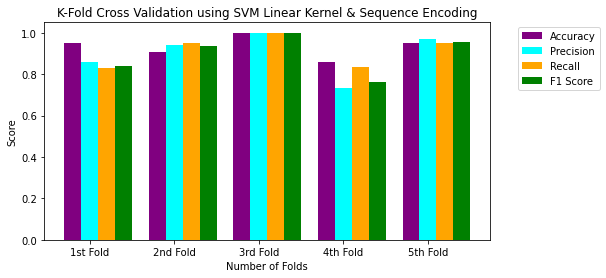

In [47]:
# Visualize evaluation score
fig = plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_accuracy, width=0.2, color='purple', label = 'Accuracy')
plt.bar(x_axis +0.0, fold_precision, width=0.2, color='cyan', label = 'Precision')
plt.bar(x_axis +0.2, fold_recall, width=0.2, color='orange', label = 'Recall')
plt.bar(x_axis +0.4, fold_f1, width=0.2, color='green', label = 'F1 Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using SVM Linear Kernel & Sequence Encoding")
plt.show()

In [48]:
# Predict data test
test = y_test_enc
y_pred = linear_svm.predict(np.array(x_test_enc))
print("Actual:   ", test)
print("Predicted:", y_pred)

Actual:    [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]
Predicted: [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 4 1 1 0 2 5 1 6 0 5 0 4 0 2 5]


In [49]:
print("Accuracy Score:", accuracy_score(test, y_pred))
print("Precision Score:", precision_score(test, y_pred, average='macro', zero_division=0))
print("Recall Score:", recall_score(test, y_pred, average='macro', zero_division=0))
print("F1 Score:", f1_score(test, y_pred, average='macro', zero_division=0))

Accuracy Score: 0.9714285714285714
Precision Score: 0.9642857142857143
Recall Score: 0.9761904761904763
F1 Score: 0.9666048237476809


In [50]:
from sklearn.metrics import classification_report
print(classification_report(test, y_pred, target_names=target_names, zero_division=0))

                     precision    recall  f1-score   support

   Human Adenovirus       1.00      1.00      1.00         7
           MERS-CoV       1.00      0.83      0.91         6
Parainfluenza virus       1.00      1.00      1.00         7
     Rhinovirus-HRV       1.00      1.00      1.00         5
         SARS-CoV-2       0.75      1.00      0.86         3
   Zaire Ebolavirus       1.00      1.00      1.00         5
         Zika virus       1.00      1.00      1.00         2

           accuracy                           0.97        35
          macro avg       0.96      0.98      0.97        35
       weighted avg       0.98      0.97      0.97        35



<b>N-mers Frequency</b>

In [51]:
from sklearn.svm import SVC
linear_svm = SVC(kernel='linear')

In [52]:
train = x_train_fold_nmers
val = x_val_fold_nmers

fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    linear_svm.fit(train[fold][0], train[fold][1]) # start training
    y_pred = linear_svm.predict(val[fold][0])
    fold_accuracy.append(accuracy_score(val[fold][1], y_pred))
    fold_precision.append(precision_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_recall.append(recall_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_f1.append(f1_score(val[fold][1], y_pred, average='macro', zero_division=0))
    print("\t Actual:   ", val[fold][1])
    print("\t Predicted:", y_pred)
print("Training done!\n")

print("Accuracy per-fold:", fold_accuracy)
print("Precision per-fold:", fold_precision)
print("Recall per-fold:", fold_recall)
print("F1 score per-fold:", fold_f1)
print()
print("Overall Accuracy:", np.array(fold_accuracy).mean())
print("Overall Precision:", np.array(fold_precision).mean())
print("Overall Recall:", np.array(fold_recall).mean())
print("Overall F1 score:", np.array(fold_f1).mean())

Training start!
Fold iteration: 0
	 Actual:    [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
	 Predicted: [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
Fold iteration: 1
	 Actual:    [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
	 Predicted: [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
Fold iteration: 2
	 Actual:    [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
	 Predicted: [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
Fold iteration: 3
	 Actual:    [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
	 Predicted: [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
Fold iteration: 4
	 Actual:    [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
	 Predicted: [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
Training done!

Accuracy per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Precision per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Recall per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
F1 score per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Overall F1 score: 1.0


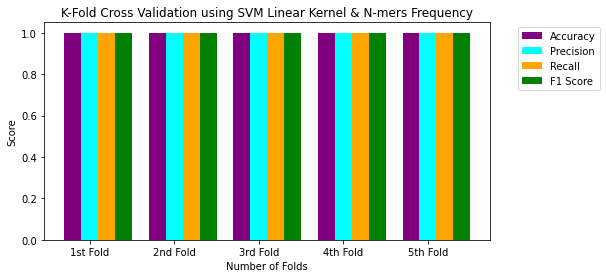

In [53]:
# Visualize evaluation score
fig = plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_accuracy, width=0.2, color='purple', label = 'Accuracy')
plt.bar(x_axis +0.0, fold_precision, width=0.2, color='cyan', label = 'Precision')
plt.bar(x_axis +0.2, fold_recall, width=0.2, color='orange', label = 'Recall')
plt.bar(x_axis +0.4, fold_f1, width=0.2, color='green', label = 'F1 Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using SVM Linear Kernel & N-mers Frequency")
plt.show()

In [54]:
# Predict data test
test = y_test_nmers
y_pred = linear_svm.predict(np.array(x_test_nmers))
print("Actual:   ", test)
print("Predicted:", y_pred)

Actual:    [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]
Predicted: [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]


In [55]:
print("Accuracy Score:", accuracy_score(test, y_pred))
print("Precision Score:", precision_score(test, y_pred, average='macro', zero_division=0))
print("Recall Score:", recall_score(test, y_pred, average='macro', zero_division=0))
print("F1 Score:", f1_score(test, y_pred, average='macro', zero_division=0))

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


In [56]:
from sklearn.metrics import classification_report
print(classification_report(test, y_pred, target_names=target_names, zero_division=0))

                     precision    recall  f1-score   support

   Human Adenovirus       1.00      1.00      1.00         7
           MERS-CoV       1.00      1.00      1.00         6
Parainfluenza virus       1.00      1.00      1.00         7
     Rhinovirus-HRV       1.00      1.00      1.00         5
         SARS-CoV-2       1.00      1.00      1.00         3
   Zaire Ebolavirus       1.00      1.00      1.00         5
         Zika virus       1.00      1.00      1.00         2

           accuracy                           1.00        35
          macro avg       1.00      1.00      1.00        35
       weighted avg       1.00      1.00      1.00        35



<b>Conjoint Triad</b>

In [57]:
from sklearn.svm import SVC
linear_svm = SVC(kernel='linear')

In [58]:
train = x_train_fold_conj
val = x_val_fold_conj

fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    linear_svm.fit(train[fold][0], train[fold][1]) # start training
    y_pred = linear_svm.predict(val[fold][0])
    fold_accuracy.append(accuracy_score(val[fold][1], y_pred))
    fold_precision.append(precision_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_recall.append(recall_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_f1.append(f1_score(val[fold][1], y_pred, average='macro', zero_division=0))
    print("\t Actual:   ", val[fold][1])
    print("\t Predicted:", y_pred)
print("Training done!\n")

print("Accuracy per-fold:", fold_accuracy)
print("Precision per-fold:", fold_precision)
print("Recall per-fold:", fold_recall)
print("F1 score per-fold:", fold_f1)
print()
print("Overall Accuracy:", np.array(fold_accuracy).mean())
print("Overall Precision:", np.array(fold_precision).mean())
print("Overall Recall:", np.array(fold_recall).mean())
print("Overall F1 score:", np.array(fold_f1).mean())

Training start!
Fold iteration: 0
	 Actual:    [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
	 Predicted: [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
Fold iteration: 1
	 Actual:    [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
	 Predicted: [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
Fold iteration: 2
	 Actual:    [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
	 Predicted: [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
Fold iteration: 3
	 Actual:    [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
	 Predicted: [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
Fold iteration: 4
	 Actual:    [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
	 Predicted: [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
Training done!

Accuracy per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Precision per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Recall per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
F1 score per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Overall F1 score: 1.0


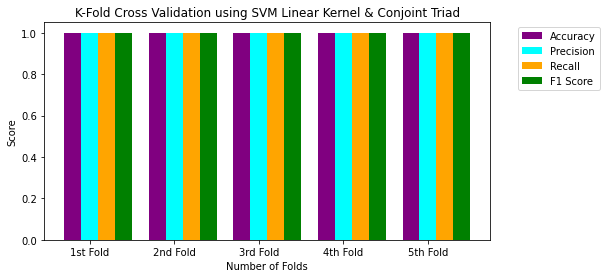

In [59]:
# Visualize evaluation score
fig = plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_accuracy, width=0.2, color='purple', label = 'Accuracy')
plt.bar(x_axis +0.0, fold_precision, width=0.2, color='cyan', label = 'Precision')
plt.bar(x_axis +0.2, fold_recall, width=0.2, color='orange', label = 'Recall')
plt.bar(x_axis +0.4, fold_f1, width=0.2, color='green', label = 'F1 Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using SVM Linear Kernel & Conjoint Triad")
plt.show()

In [60]:
# Predict data test
test = y_test_conj
y_pred = linear_svm.predict(np.array(x_test_conj))
print("Actual:   ", test)
print("Predicted:", y_pred)

Actual:    [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]
Predicted: [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]


In [61]:
print("Accuracy Score:", accuracy_score(test, y_pred))
print("Precision Score:", precision_score(test, y_pred, average='macro', zero_division=0))
print("Recall Score:", recall_score(test, y_pred, average='macro', zero_division=0))
print("F1 Score:", f1_score(test, y_pred, average='macro', zero_division=0))

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


In [62]:
from sklearn.metrics import classification_report
print(classification_report(test, y_pred, target_names=target_names, zero_division=0))

                     precision    recall  f1-score   support

   Human Adenovirus       1.00      1.00      1.00         7
           MERS-CoV       1.00      1.00      1.00         6
Parainfluenza virus       1.00      1.00      1.00         7
     Rhinovirus-HRV       1.00      1.00      1.00         5
         SARS-CoV-2       1.00      1.00      1.00         3
   Zaire Ebolavirus       1.00      1.00      1.00         5
         Zika virus       1.00      1.00      1.00         2

           accuracy                           1.00        35
          macro avg       1.00      1.00      1.00        35
       weighted avg       1.00      1.00      1.00        35



### RBF Kernel

<b>Sequence Encoding</b>

In [63]:
from sklearn.svm import SVC
rbf_svm = SVC(kernel='rbf')

In [64]:
train = x_train_fold_enc
val = x_val_fold_enc

fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    rbf_svm.fit(train[fold][0], train[fold][1]) # start training
    y_pred = rbf_svm.predict(val[fold][0])
    fold_accuracy.append(accuracy_score(val[fold][1], y_pred))
    fold_precision.append(precision_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_recall.append(recall_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_f1.append(f1_score(val[fold][1], y_pred, average='macro', zero_division=0))
    print("\t Actual:   ", val[fold][1])
    print("\t Predicted:", y_pred)
print("Training done!\n")

print("Accuracy per-fold:", fold_accuracy)
print("Precision per-fold:", fold_precision)
print("Recall per-fold:", fold_recall)
print("F1 score per-fold:", fold_f1)
print()
print("Overall Accuracy:", np.array(fold_accuracy).mean())
print("Overall Precision:", np.array(fold_precision).mean())
print("Overall Recall:", np.array(fold_recall).mean())
print("Overall F1 score:", np.array(fold_f1).mean())

Training start!
Fold iteration: 0
	 Actual:    [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
	 Predicted: [6 2 6 1 2 5 0 5 3 0 0 2 1 0 1 5 1 5 1 5 2]
Fold iteration: 1
	 Actual:    [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
	 Predicted: [3 4 3 2 4 4 2 5 6 4 3 0 1 4 5 1 6 6 1 4 3]
Fold iteration: 2
	 Actual:    [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
	 Predicted: [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
Fold iteration: 3
	 Actual:    [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
	 Predicted: [4 3 0 6 4 6 2 6 4 0 4 3 0 0 2 4 3 3 0 0 6]
Fold iteration: 4
	 Actual:    [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
	 Predicted: [0 4 4 4 5 5 5 6 4 3 2 5 4 1 3 6 3 6 6 3 1]
Training done!

Accuracy per-fold: [0.7619047619047619, 0.8571428571428571, 1.0, 0.8571428571428571, 0.9523809523809523]
Precision per-fold: [0.7142857142857143, 0.9285714285714286, 1.0, 0.7333333333333334, 0.9714285714285714]
Recall per-fold: [0.7142857142857143, 0.9285714285714286, 1.0, 0.8333333333333334, 0.952380952380

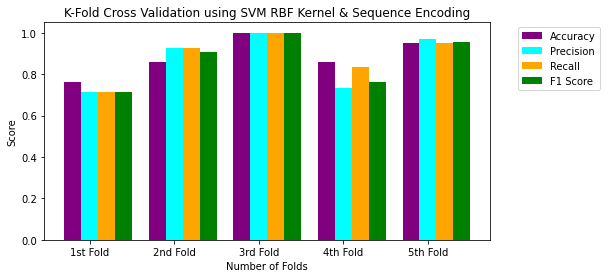

In [65]:
# Visualize evaluation score
fig = plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_accuracy, width=0.2, color='purple', label = 'Accuracy')
plt.bar(x_axis +0.0, fold_precision, width=0.2, color='cyan', label = 'Precision')
plt.bar(x_axis +0.2, fold_recall, width=0.2, color='orange', label = 'Recall')
plt.bar(x_axis +0.4, fold_f1, width=0.2, color='green', label = 'F1 Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using SVM RBF Kernel & Sequence Encoding")
plt.show()

In [66]:
# Predict data test
test = y_test_enc
y_pred = rbf_svm.predict(np.array(x_test_enc))
print("Actual:   ", test)
print("Predicted:", y_pred)

Actual:    [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]
Predicted: [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 4 1 1 0 2 5 1 6 0 5 0 4 0 2 5]


In [67]:
print("Accuracy Score:", accuracy_score(test, y_pred))
print("Precision Score:", precision_score(test, y_pred, average='macro', zero_division=0))
print("Recall Score:", recall_score(test, y_pred, average='macro', zero_division=0))
print("F1 Score:", f1_score(test, y_pred, average='macro', zero_division=0))

Accuracy Score: 0.9714285714285714
Precision Score: 0.9642857142857143
Recall Score: 0.9761904761904763
F1 Score: 0.9666048237476809


In [68]:
from sklearn.metrics import classification_report
print(classification_report(test, y_pred, target_names=target_names, zero_division=0))

                     precision    recall  f1-score   support

   Human Adenovirus       1.00      1.00      1.00         7
           MERS-CoV       1.00      0.83      0.91         6
Parainfluenza virus       1.00      1.00      1.00         7
     Rhinovirus-HRV       1.00      1.00      1.00         5
         SARS-CoV-2       0.75      1.00      0.86         3
   Zaire Ebolavirus       1.00      1.00      1.00         5
         Zika virus       1.00      1.00      1.00         2

           accuracy                           0.97        35
          macro avg       0.96      0.98      0.97        35
       weighted avg       0.98      0.97      0.97        35



<b>N-mers Frequency</b>

In [69]:
from sklearn.svm import SVC
rbf_svm = SVC(kernel='rbf')

In [70]:
train = x_train_fold_nmers
val = x_val_fold_nmers

fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    rbf_svm.fit(train[fold][0], train[fold][1]) # start training
    y_pred = rbf_svm.predict(val[fold][0])
    fold_accuracy.append(accuracy_score(val[fold][1], y_pred))
    fold_precision.append(precision_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_recall.append(recall_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_f1.append(f1_score(val[fold][1], y_pred, average='macro', zero_division=0))
    print("\t Actual:   ", val[fold][1])
    print("\t Predicted:", y_pred)
print("Training done!\n")

print("Accuracy per-fold:", fold_accuracy)
print("Precision per-fold:", fold_precision)
print("Recall per-fold:", fold_recall)
print("F1 score per-fold:", fold_f1)
print()
print("Overall Accuracy:", np.array(fold_accuracy).mean())
print("Overall Precision:", np.array(fold_precision).mean())
print("Overall Recall:", np.array(fold_recall).mean())
print("Overall F1 score:", np.array(fold_f1).mean())

Training start!
Fold iteration: 0
	 Actual:    [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
	 Predicted: [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
Fold iteration: 1
	 Actual:    [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
	 Predicted: [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
Fold iteration: 2
	 Actual:    [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
	 Predicted: [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
Fold iteration: 3
	 Actual:    [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
	 Predicted: [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
Fold iteration: 4
	 Actual:    [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
	 Predicted: [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
Training done!

Accuracy per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Precision per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Recall per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
F1 score per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Overall F1 score: 1.0


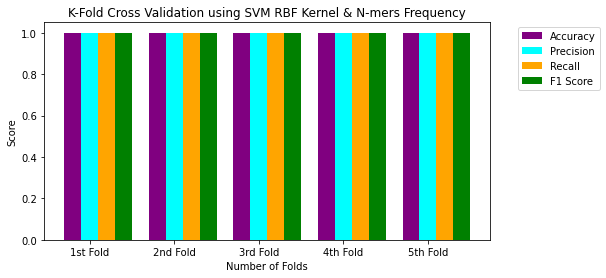

In [71]:
# Visualize evaluation score
fig = plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_accuracy, width=0.2, color='purple', label = 'Accuracy')
plt.bar(x_axis +0.0, fold_precision, width=0.2, color='cyan', label = 'Precision')
plt.bar(x_axis +0.2, fold_recall, width=0.2, color='orange', label = 'Recall')
plt.bar(x_axis +0.4, fold_f1, width=0.2, color='green', label = 'F1 Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using SVM RBF Kernel & N-mers Frequency")
plt.show()

In [72]:
# Predict data test
test = y_test_nmers
y_pred = rbf_svm.predict(np.array(x_test_nmers))
print("Actual:   ", test)
print("Predicted:", y_pred)

Actual:    [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]
Predicted: [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]


In [73]:
print("Accuracy Score:", accuracy_score(test, y_pred))
print("Precision Score:", precision_score(test, y_pred, average='macro', zero_division=0))
print("Recall Score:", recall_score(test, y_pred, average='macro', zero_division=0))
print("F1 Score:", f1_score(test, y_pred, average='macro', zero_division=0))

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


In [74]:
from sklearn.metrics import classification_report
print(classification_report(test, y_pred, target_names=target_names, zero_division=0))

                     precision    recall  f1-score   support

   Human Adenovirus       1.00      1.00      1.00         7
           MERS-CoV       1.00      1.00      1.00         6
Parainfluenza virus       1.00      1.00      1.00         7
     Rhinovirus-HRV       1.00      1.00      1.00         5
         SARS-CoV-2       1.00      1.00      1.00         3
   Zaire Ebolavirus       1.00      1.00      1.00         5
         Zika virus       1.00      1.00      1.00         2

           accuracy                           1.00        35
          macro avg       1.00      1.00      1.00        35
       weighted avg       1.00      1.00      1.00        35



<b>Conjoint Triad</b>

In [75]:
from sklearn.svm import SVC
rbf_svm = SVC(kernel='rbf')

In [76]:
train = x_train_fold_conj
val = x_val_fold_conj

fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    rbf_svm.fit(train[fold][0], train[fold][1]) # start training
    y_pred = rbf_svm.predict(val[fold][0])
    fold_accuracy.append(accuracy_score(val[fold][1], y_pred))
    fold_precision.append(precision_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_recall.append(recall_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_f1.append(f1_score(val[fold][1], y_pred, average='macro', zero_division=0))
    print("\t Actual:   ", val[fold][1])
    print("\t Predicted:", y_pred)
print("Training done!\n")

print("Accuracy per-fold:", fold_accuracy)
print("Precision per-fold:", fold_precision)
print("Recall per-fold:", fold_recall)
print("F1 score per-fold:", fold_f1)
print()
print("Overall Accuracy:", np.array(fold_accuracy).mean())
print("Overall Precision:", np.array(fold_precision).mean())
print("Overall Recall:", np.array(fold_recall).mean())
print("Overall F1 score:", np.array(fold_f1).mean())

Training start!
Fold iteration: 0
	 Actual:    [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
	 Predicted: [6 5 6 4 5 5 0 5 3 0 0 5 4 0 4 5 4 5 4 5 5]
Fold iteration: 1
	 Actual:    [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
	 Predicted: [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
Fold iteration: 2
	 Actual:    [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
	 Predicted: [5 6 6 4 5 6 6 3 0 4 5 4 5 1 3 5 1 6 5 5 5]
Fold iteration: 3
	 Actual:    [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
	 Predicted: [1 3 0 6 1 6 2 6 4 0 4 3 0 0 5 1 3 3 0 0 6]
Fold iteration: 4
	 Actual:    [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
	 Predicted: [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
Training done!

Accuracy per-fold: [0.8095238095238095, 1.0, 0.8095238095238095, 0.9523809523809523, 1.0]
Precision per-fold: [0.7592592592592592, 1.0, 0.7857142857142857, 0.8571428571428571, 1.0]
Recall per-fold: [0.8333333333333334, 1.0, 0.8571428571428571, 0.7857142857142857, 1.0]
F1 score per-fold: [0.7857142857142857,

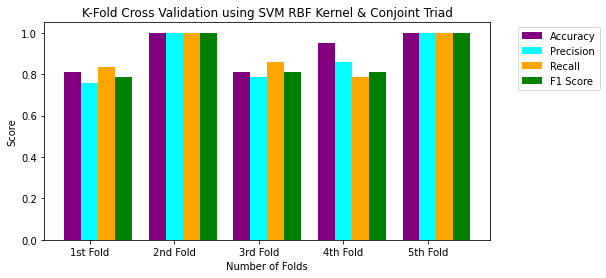

In [77]:
# Visualize evaluation score
fig = plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_accuracy, width=0.2, color='purple', label = 'Accuracy')
plt.bar(x_axis +0.0, fold_precision, width=0.2, color='cyan', label = 'Precision')
plt.bar(x_axis +0.2, fold_recall, width=0.2, color='orange', label = 'Recall')
plt.bar(x_axis +0.4, fold_f1, width=0.2, color='green', label = 'F1 Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using SVM RBF Kernel & Conjoint Triad")
plt.show()

In [78]:
# Predict data test
test = y_test_conj
y_pred = rbf_svm.predict(np.array(x_test_conj))
print("Actual:   ", test)
print("Predicted:", y_pred)

Actual:    [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]
Predicted: [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]


In [79]:
print("Accuracy Score:", accuracy_score(test, y_pred))
print("Precision Score:", precision_score(test, y_pred, average='macro', zero_division=0))
print("Recall Score:", recall_score(test, y_pred, average='macro', zero_division=0))
print("F1 Score:", f1_score(test, y_pred, average='macro', zero_division=0))

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


In [80]:
from sklearn.metrics import classification_report
print(classification_report(test, y_pred, target_names=target_names, zero_division=0))

                     precision    recall  f1-score   support

   Human Adenovirus       1.00      1.00      1.00         7
           MERS-CoV       1.00      1.00      1.00         6
Parainfluenza virus       1.00      1.00      1.00         7
     Rhinovirus-HRV       1.00      1.00      1.00         5
         SARS-CoV-2       1.00      1.00      1.00         3
   Zaire Ebolavirus       1.00      1.00      1.00         5
         Zika virus       1.00      1.00      1.00         2

           accuracy                           1.00        35
          macro avg       1.00      1.00      1.00        35
       weighted avg       1.00      1.00      1.00        35



### Polynomial Kernel

<b>Sequence Encoding</b>

In [81]:
from sklearn.svm import SVC
poly_svm = SVC(kernel='poly')

In [82]:
train = x_train_fold_enc
val = x_val_fold_enc

fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    poly_svm.fit(train[fold][0], train[fold][1]) # start training
    y_pred = poly_svm.predict(val[fold][0])
    fold_accuracy.append(accuracy_score(val[fold][1], y_pred))
    fold_precision.append(precision_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_recall.append(recall_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_f1.append(f1_score(val[fold][1], y_pred, average='macro', zero_division=0))
    print("\t Actual:   ", val[fold][1])
    print("\t Predicted:", y_pred)
print("Training done!\n")

print("Accuracy per-fold:", fold_accuracy)
print("Precision per-fold:", fold_precision)
print("Recall per-fold:", fold_recall)
print("F1 score per-fold:", fold_f1)
print()
print("Overall Accuracy:", np.array(fold_accuracy).mean())
print("Overall Precision:", np.array(fold_precision).mean())
print("Overall Recall:", np.array(fold_recall).mean())
print("Overall F1 score:", np.array(fold_f1).mean())

Training start!
Fold iteration: 0
	 Actual:    [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
	 Predicted: [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
Fold iteration: 1
	 Actual:    [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
	 Predicted: [3 4 3 2 4 4 2 5 6 4 3 0 1 4 5 1 6 6 1 4 3]
Fold iteration: 2
	 Actual:    [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
	 Predicted: [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
Fold iteration: 3
	 Actual:    [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
	 Predicted: [4 3 0 6 4 6 2 6 4 0 4 3 0 0 2 4 3 3 0 0 6]
Fold iteration: 4
	 Actual:    [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
	 Predicted: [0 4 4 4 5 5 5 6 4 3 2 5 4 1 3 6 3 6 6 3 1]
Training done!

Accuracy per-fold: [1.0, 0.8571428571428571, 1.0, 0.8571428571428571, 0.9523809523809523]
Precision per-fold: [1.0, 0.9285714285714286, 1.0, 0.7333333333333334, 0.9714285714285714]
Recall per-fold: [1.0, 0.9285714285714286, 1.0, 0.8333333333333334, 0.9523809523809523]
F1 score per-fold: [1.0, 0.904761904761

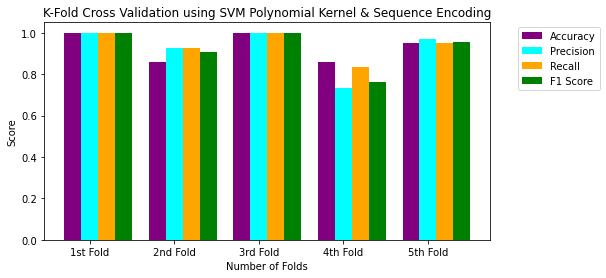

In [83]:
# Visualize evaluation score
fig = plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_accuracy, width=0.2, color='purple', label = 'Accuracy')
plt.bar(x_axis +0.0, fold_precision, width=0.2, color='cyan', label = 'Precision')
plt.bar(x_axis +0.2, fold_recall, width=0.2, color='orange', label = 'Recall')
plt.bar(x_axis +0.4, fold_f1, width=0.2, color='green', label = 'F1 Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using SVM Polynomial Kernel & Sequence Encoding")
plt.show()

In [84]:
# Predict data test
test = y_test_enc
y_pred = poly_svm.predict(np.array(x_test_enc))
print("Actual:   ", test)
print("Predicted:", y_pred)

Actual:    [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]
Predicted: [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 4 1 1 0 2 5 1 6 0 5 0 4 0 2 5]


In [85]:
print("Accuracy Score:", accuracy_score(test, y_pred))
print("Precision Score:", precision_score(test, y_pred, average='macro', zero_division=0))
print("Recall Score:", recall_score(test, y_pred, average='macro', zero_division=0))
print("F1 Score:", f1_score(test, y_pred, average='macro', zero_division=0))

Accuracy Score: 0.9714285714285714
Precision Score: 0.9642857142857143
Recall Score: 0.9761904761904763
F1 Score: 0.9666048237476809


In [86]:
from sklearn.metrics import classification_report
print(classification_report(test, y_pred, target_names=target_names, zero_division=0))

                     precision    recall  f1-score   support

   Human Adenovirus       1.00      1.00      1.00         7
           MERS-CoV       1.00      0.83      0.91         6
Parainfluenza virus       1.00      1.00      1.00         7
     Rhinovirus-HRV       1.00      1.00      1.00         5
         SARS-CoV-2       0.75      1.00      0.86         3
   Zaire Ebolavirus       1.00      1.00      1.00         5
         Zika virus       1.00      1.00      1.00         2

           accuracy                           0.97        35
          macro avg       0.96      0.98      0.97        35
       weighted avg       0.98      0.97      0.97        35



<b>N-mers Frequency</b>

In [87]:
from sklearn.svm import SVC
poly_svm = SVC(kernel='poly')

In [88]:
train = x_train_fold_nmers
val = x_val_fold_nmers

fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    poly_svm.fit(train[fold][0], train[fold][1]) # start training
    y_pred = poly_svm.predict(val[fold][0])
    fold_accuracy.append(accuracy_score(val[fold][1], y_pred))
    fold_precision.append(precision_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_recall.append(recall_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_f1.append(f1_score(val[fold][1], y_pred, average='macro', zero_division=0))
    print("\t Actual:   ", val[fold][1])
    print("\t Predicted:", y_pred)
print("Training done!\n")

print("Accuracy per-fold:", fold_accuracy)
print("Precision per-fold:", fold_precision)
print("Recall per-fold:", fold_recall)
print("F1 score per-fold:", fold_f1)
print()
print("Overall Accuracy:", np.array(fold_accuracy).mean())
print("Overall Precision:", np.array(fold_precision).mean())
print("Overall Recall:", np.array(fold_recall).mean())
print("Overall F1 score:", np.array(fold_f1).mean())

Training start!
Fold iteration: 0
	 Actual:    [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
	 Predicted: [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
Fold iteration: 1
	 Actual:    [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
	 Predicted: [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
Fold iteration: 2
	 Actual:    [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
	 Predicted: [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
Fold iteration: 3
	 Actual:    [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
	 Predicted: [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
Fold iteration: 4
	 Actual:    [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
	 Predicted: [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
Training done!

Accuracy per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Precision per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Recall per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
F1 score per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Overall F1 score: 1.0


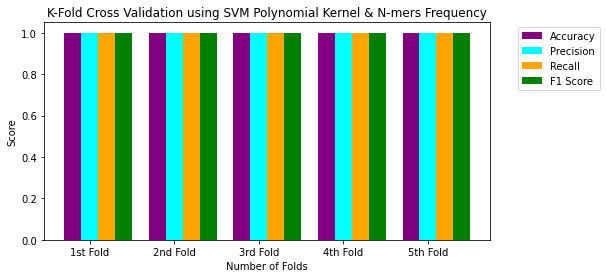

In [89]:
# Visualize evaluation score
fig = plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_accuracy, width=0.2, color='purple', label = 'Accuracy')
plt.bar(x_axis +0.0, fold_precision, width=0.2, color='cyan', label = 'Precision')
plt.bar(x_axis +0.2, fold_recall, width=0.2, color='orange', label = 'Recall')
plt.bar(x_axis +0.4, fold_f1, width=0.2, color='green', label = 'F1 Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using SVM Polynomial Kernel & N-mers Frequency")
plt.show()

In [90]:
# Predict data test
test = y_test_nmers
y_pred = poly_svm.predict(np.array(x_test_nmers))
print("Actual:   ", test)
print("Predicted:", y_pred)

Actual:    [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]
Predicted: [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 5 5]


In [91]:
print("Accuracy Score:", accuracy_score(test, y_pred))
print("Precision Score:", precision_score(test, y_pred, average='macro', zero_division=0))
print("Recall Score:", recall_score(test, y_pred, average='macro', zero_division=0))
print("F1 Score:", f1_score(test, y_pred, average='macro', zero_division=0))

Accuracy Score: 0.9714285714285714
Precision Score: 0.9761904761904762
Recall Score: 0.979591836734694
F1 Score: 0.9760239760239761


In [92]:
from sklearn.metrics import classification_report
print(classification_report(test, y_pred, target_names=target_names, zero_division=0))

                     precision    recall  f1-score   support

   Human Adenovirus       1.00      1.00      1.00         7
           MERS-CoV       1.00      1.00      1.00         6
Parainfluenza virus       1.00      0.86      0.92         7
     Rhinovirus-HRV       1.00      1.00      1.00         5
         SARS-CoV-2       1.00      1.00      1.00         3
   Zaire Ebolavirus       0.83      1.00      0.91         5
         Zika virus       1.00      1.00      1.00         2

           accuracy                           0.97        35
          macro avg       0.98      0.98      0.98        35
       weighted avg       0.98      0.97      0.97        35



<b>Conjoint Triad</b>

In [93]:
from sklearn.svm import SVC
poly_svm = SVC(kernel='poly')

In [94]:
train = x_train_fold_conj
val = x_val_fold_conj

fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    poly_svm.fit(train[fold][0], train[fold][1]) # start training
    y_pred = poly_svm.predict(val[fold][0])
    fold_accuracy.append(accuracy_score(val[fold][1], y_pred))
    fold_precision.append(precision_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_recall.append(recall_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_f1.append(f1_score(val[fold][1], y_pred, average='macro', zero_division=0))
    print("\t Actual:   ", val[fold][1])
    print("\t Predicted:", y_pred)
print("Training done!\n")

print("Accuracy per-fold:", fold_accuracy)
print("Precision per-fold:", fold_precision)
print("Recall per-fold:", fold_recall)
print("F1 score per-fold:", fold_f1)
print()
print("Overall Accuracy:", np.array(fold_accuracy).mean())
print("Overall Precision:", np.array(fold_precision).mean())
print("Overall Recall:", np.array(fold_recall).mean())
print("Overall F1 score:", np.array(fold_f1).mean())

Training start!
Fold iteration: 0
	 Actual:    [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
	 Predicted: [6 6 6 4 6 5 0 5 6 0 0 6 4 0 4 5 4 5 4 5 6]
Fold iteration: 1
	 Actual:    [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
	 Predicted: [6 4 6 5 4 1 5 5 6 4 6 0 1 1 5 1 6 6 1 1 6]
Fold iteration: 2
	 Actual:    [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
	 Predicted: [5 6 6 4 5 6 6 3 0 4 6 4 6 1 3 6 1 6 5 5 6]
Fold iteration: 3
	 Actual:    [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
	 Predicted: [1 6 0 6 1 6 5 6 4 0 4 6 0 0 5 1 6 6 0 0 6]
Fold iteration: 4
	 Actual:    [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
	 Predicted: [0 4 4 4 2 2 2 6 4 6 2 2 1 1 6 6 6 6 6 6 1]
Training done!

Accuracy per-fold: [0.7619047619047619, 0.7142857142857143, 0.8095238095238095, 0.7142857142857143, 0.6190476190476191]
Precision per-fold: [0.5476190476190476, 0.5612244897959183, 0.7936507936507936, 0.5, 0.5285714285714286]
Recall per-fold: [0.6666666666666666, 0.7142857142857143, 0.8571428571428571, 0.57

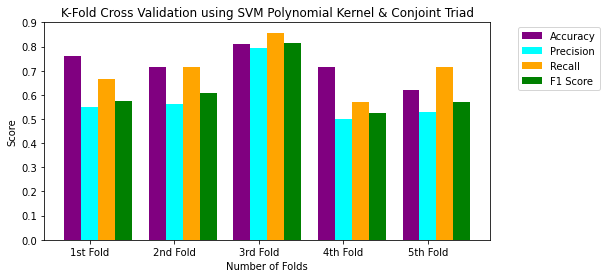

In [95]:
# Visualize evaluation score
fig = plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_accuracy, width=0.2, color='purple', label = 'Accuracy')
plt.bar(x_axis +0.0, fold_precision, width=0.2, color='cyan', label = 'Precision')
plt.bar(x_axis +0.2, fold_recall, width=0.2, color='orange', label = 'Recall')
plt.bar(x_axis +0.4, fold_f1, width=0.2, color='green', label = 'F1 Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using SVM Polynomial Kernel & Conjoint Triad")
plt.show()

In [96]:
# Predict data test
test = y_test_conj
y_pred = poly_svm.predict(np.array(x_test_conj))
print("Actual:   ", test)
print("Predicted:", y_pred)

Actual:    [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]
Predicted: [6 2 2 2 0 4 1 0 2 6 6 0 2 6 2 6 6 2 1 4 1 1 1 0 2 2 1 6 0 2 0 4 0 6 2]


In [97]:
print("Accuracy Score:", accuracy_score(test, y_pred))
print("Precision Score:", precision_score(test, y_pred, average='macro', zero_division=0))
print("Recall Score:", recall_score(test, y_pred, average='macro', zero_division=0))
print("F1 Score:", f1_score(test, y_pred, average='macro', zero_division=0))

Accuracy Score: 0.6857142857142857
Precision Score: 0.5422077922077922
Recall Score: 0.6938775510204083
F1 Score: 0.5809523809523809


In [98]:
from sklearn.metrics import classification_report
print(classification_report(test, y_pred, target_names=target_names, zero_division=0))

                     precision    recall  f1-score   support

   Human Adenovirus       1.00      1.00      1.00         7
           MERS-CoV       1.00      1.00      1.00         6
Parainfluenza virus       0.55      0.86      0.67         7
     Rhinovirus-HRV       0.00      0.00      0.00         5
         SARS-CoV-2       1.00      1.00      1.00         3
   Zaire Ebolavirus       0.00      0.00      0.00         5
         Zika virus       0.25      1.00      0.40         2

           accuracy                           0.69        35
          macro avg       0.54      0.69      0.58        35
       weighted avg       0.58      0.69      0.61        35



### Sigmoid Kernel

<b>Sequence Encoding</b>

In [99]:
from sklearn.svm import SVC
sigmoid_svm = SVC(kernel='sigmoid')

In [100]:
train = x_train_fold_enc
val = x_val_fold_enc

fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    sigmoid_svm.fit(train[fold][0], train[fold][1]) # start training
    y_pred = sigmoid_svm.predict(val[fold][0])
    fold_accuracy.append(accuracy_score(val[fold][1], y_pred))
    fold_precision.append(precision_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_recall.append(recall_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_f1.append(f1_score(val[fold][1], y_pred, average='macro', zero_division=0))
    print("\t Actual:   ", val[fold][1])
    print("\t Predicted:", y_pred)
print("Training done!\n")

print("Accuracy per-fold:", fold_accuracy)
print("Precision per-fold:", fold_precision)
print("Recall per-fold:", fold_recall)
print("F1 score per-fold:", fold_f1)
print()
print("Overall Accuracy:", np.array(fold_accuracy).mean())
print("Overall Precision:", np.array(fold_precision).mean())
print("Overall Recall:", np.array(fold_recall).mean())
print("Overall F1 score:", np.array(fold_f1).mean())

Training start!
Fold iteration: 0
	 Actual:    [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
	 Predicted: [6 5 6 1 2 5 1 5 3 1 1 2 1 1 1 5 1 5 1 5 5]
Fold iteration: 1
	 Actual:    [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
	 Predicted: [3 4 3 2 4 4 2 5 6 4 3 4 4 4 5 4 6 6 4 4 3]
Fold iteration: 2
	 Actual:    [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
	 Predicted: [5 6 6 4 5 6 6 3 4 4 5 4 5 4 3 5 4 6 5 5 5]
Fold iteration: 3
	 Actual:    [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
	 Predicted: [4 3 4 6 4 6 2 6 4 4 4 3 4 4 2 4 3 3 4 4 6]
Fold iteration: 4
	 Actual:    [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
	 Predicted: [4 4 4 4 5 5 5 6 4 3 2 5 4 4 3 6 3 6 6 3 4]
Training done!

Accuracy per-fold: [0.47619047619047616, 0.6666666666666666, 0.6666666666666666, 0.5714285714285714, 0.8095238095238095]
Precision per-fold: [0.5306122448979592, 0.6142857142857142, 0.42857142857142855, 0.5303030303030303, 0.6428571428571429]
Recall per-fold: [0.5, 0.7142857142857143, 0.5714285714285714, 0.

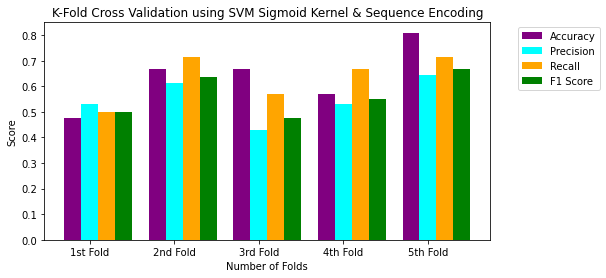

In [101]:
# Visualize evaluation score
fig = plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_accuracy, width=0.2, color='purple', label = 'Accuracy')
plt.bar(x_axis +0.0, fold_precision, width=0.2, color='cyan', label = 'Precision')
plt.bar(x_axis +0.2, fold_recall, width=0.2, color='orange', label = 'Recall')
plt.bar(x_axis +0.4, fold_f1, width=0.2, color='green', label = 'F1 Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using SVM Sigmoid Kernel & Sequence Encoding")
plt.show()

In [102]:
# Predict data test
test = y_test_enc
y_pred = sigmoid_svm.predict(np.array(x_test_enc))
print("Actual:   ", test)
print("Predicted:", y_pred)

Actual:    [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]
Predicted: [3 2 2 5 4 4 4 4 2 3 3 4 5 3 2 6 3 2 4 4 4 4 4 4 2 5 4 6 4 5 4 4 4 2 5]


In [103]:
print("Accuracy Score:", accuracy_score(test, y_pred))
print("Precision Score:", precision_score(test, y_pred, average='macro', zero_division=0))
print("Recall Score:", recall_score(test, y_pred, average='macro', zero_division=0))
print("F1 Score:", f1_score(test, y_pred, average='macro', zero_division=0))

Accuracy Score: 0.6285714285714286
Precision Score: 0.5982142857142857
Recall Score: 0.7142857142857143
F1 Score: 0.6165413533834586


In [104]:
from sklearn.metrics import classification_report
print(classification_report(test, y_pred, target_names=target_names, zero_division=0))

                     precision    recall  f1-score   support

   Human Adenovirus       0.00      0.00      0.00         7
           MERS-CoV       0.00      0.00      0.00         6
Parainfluenza virus       1.00      1.00      1.00         7
     Rhinovirus-HRV       1.00      1.00      1.00         5
         SARS-CoV-2       0.19      1.00      0.32         3
   Zaire Ebolavirus       1.00      1.00      1.00         5
         Zika virus       1.00      1.00      1.00         2

           accuracy                           0.63        35
          macro avg       0.60      0.71      0.62        35
       weighted avg       0.56      0.63      0.57        35



<b>N-mers Frequency</b>

In [105]:
from sklearn.svm import SVC
sigmoid_svm = SVC(kernel='sigmoid')

In [106]:
train = x_train_fold_nmers
val = x_val_fold_nmers

fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    sigmoid_svm.fit(train[fold][0], train[fold][1]) # start training
    y_pred = sigmoid_svm.predict(val[fold][0])
    fold_accuracy.append(accuracy_score(val[fold][1], y_pred))
    fold_precision.append(precision_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_recall.append(recall_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_f1.append(f1_score(val[fold][1], y_pred, average='macro', zero_division=0))
    print("\t Actual:   ", val[fold][1])
    print("\t Predicted:", y_pred)
print("Training done!\n")

print("Accuracy per-fold:", fold_accuracy)
print("Precision per-fold:", fold_precision)
print("Recall per-fold:", fold_recall)
print("F1 score per-fold:", fold_f1)
print()
print("Overall Accuracy:", np.array(fold_accuracy).mean())
print("Overall Precision:", np.array(fold_precision).mean())
print("Overall Recall:", np.array(fold_recall).mean())
print("Overall F1 score:", np.array(fold_f1).mean())

Training start!
Fold iteration: 0
	 Actual:    [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
	 Predicted: [6 1 6 3 1 3 3 3 1 3 3 1 3 3 3 3 3 3 3 3 1]
Fold iteration: 1
	 Actual:    [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
	 Predicted: [4 4 4 6 4 4 6 6 6 4 4 4 4 4 6 4 6 6 4 4 4]
Fold iteration: 2
	 Actual:    [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
	 Predicted: [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
Fold iteration: 3
	 Actual:    [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
	 Predicted: [3 4 3 4 3 4 4 4 3 3 3 4 3 3 4 3 4 4 3 3 4]
Fold iteration: 4
	 Actual:    [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
	 Predicted: [4 4 4 4 6 6 6 6 4 4 4 6 4 4 4 6 4 6 6 4 4]
Training done!

Accuracy per-fold: [0.09523809523809523, 0.2857142857142857, 0.14285714285714285, 0.0, 0.38095238095238093]
Precision per-fold: [0.14285714285714285, 0.09183673469387754, 0.02040816326530612, 0.0, 0.11538461538461539]
Recall per-fold: [0.14285714285714285, 0.2857142857142857, 0.14285714285714285, 0.0, 0.285

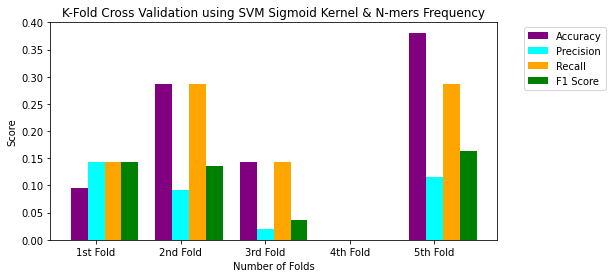

In [107]:
# Visualize evaluation score
fig = plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_accuracy, width=0.2, color='purple', label = 'Accuracy')
plt.bar(x_axis +0.0, fold_precision, width=0.2, color='cyan', label = 'Precision')
plt.bar(x_axis +0.2, fold_recall, width=0.2, color='orange', label = 'Recall')
plt.bar(x_axis +0.4, fold_f1, width=0.2, color='green', label = 'F1 Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using SVM Sigmoid Kernel & N-mers Frequency")
plt.show()

In [108]:
# Predict data test
test = y_test_nmers
y_pred = sigmoid_svm.predict(np.array(x_test_nmers))
print("Actual:   ", test)
print("Predicted:", y_pred)

Actual:    [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]
Predicted: [4 4 4 6 6 4 4 4 4 4 4 4 6 4 4 6 4 4 4 4 4 4 4 4 4 6 4 6 4 6 6 4 4 4 6]


In [109]:
print("Accuracy Score:", accuracy_score(test, y_pred))
print("Precision Score:", precision_score(test, y_pred, average='macro', zero_division=0))
print("Recall Score:", recall_score(test, y_pred, average='macro', zero_division=0))
print("F1 Score:", f1_score(test, y_pred, average='macro', zero_division=0))

Accuracy Score: 0.14285714285714285
Precision Score: 0.04822954822954823
Recall Score: 0.2857142857142857
F1 Score: 0.08150470219435736


In [110]:
from sklearn.metrics import classification_report
print(classification_report(test, y_pred, target_names=target_names, zero_division=0))

                     precision    recall  f1-score   support

   Human Adenovirus       0.00      0.00      0.00         7
           MERS-CoV       0.00      0.00      0.00         6
Parainfluenza virus       0.00      0.00      0.00         7
     Rhinovirus-HRV       0.00      0.00      0.00         5
         SARS-CoV-2       0.12      1.00      0.21         3
   Zaire Ebolavirus       0.00      0.00      0.00         5
         Zika virus       0.22      1.00      0.36         2

           accuracy                           0.14        35
          macro avg       0.05      0.29      0.08        35
       weighted avg       0.02      0.14      0.04        35



<b>Conjoint Triad</b>

In [111]:
from sklearn.svm import SVC
sigmoid_svm = SVC(kernel='sigmoid')

In [112]:
train = x_train_fold_conj
val = x_val_fold_conj

fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    sigmoid_svm.fit(train[fold][0], train[fold][1]) # start training
    y_pred = sigmoid_svm.predict(val[fold][0])
    fold_accuracy.append(accuracy_score(val[fold][1], y_pred))
    fold_precision.append(precision_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_recall.append(recall_score(val[fold][1], y_pred, average='macro', zero_division=0))
    fold_f1.append(f1_score(val[fold][1], y_pred, average='macro', zero_division=0))
    print("\t Actual:   ", val[fold][1])
    print("\t Predicted:", y_pred)
print("Training done!\n")

print("Accuracy per-fold:", fold_accuracy)
print("Precision per-fold:", fold_precision)
print("Recall per-fold:", fold_recall)
print("F1 score per-fold:", fold_f1)
print()
print("Overall Accuracy:", np.array(fold_accuracy).mean())
print("Overall Precision:", np.array(fold_precision).mean())
print("Overall Recall:", np.array(fold_recall).mean())
print("Overall F1 score:", np.array(fold_f1).mean())

Training start!
Fold iteration: 0
	 Actual:    [6 2 6 4 2 5 0 5 3 0 0 2 4 0 4 5 4 5 4 5 2]
	 Predicted: [6 1 6 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1]
Fold iteration: 1
	 Actual:    [3 4 3 2 4 1 2 5 6 4 3 0 1 1 5 1 6 6 1 1 3]
	 Predicted: [6 4 6 4 4 4 4 4 6 4 6 4 4 4 4 4 6 6 4 4 6]
Fold iteration: 2
	 Actual:    [5 6 6 4 5 6 6 3 0 4 2 4 2 1 3 2 1 6 5 5 2]
	 Predicted: [4 4 4 4 4 4 4 3 4 4 4 4 4 4 3 4 4 4 4 4 4]
Fold iteration: 3
	 Actual:    [1 3 0 6 1 6 2 6 4 0 4 3 0 0 2 1 3 3 0 0 6]
	 Predicted: [5 4 5 4 5 4 4 4 5 5 5 3 5 5 4 5 3 4 5 5 4]
Fold iteration: 4
	 Actual:    [0 4 4 4 5 5 5 6 4 3 2 5 1 1 3 6 3 6 6 3 1]
	 Predicted: [2 2 2 2 4 4 4 6 2 6 4 4 2 2 6 6 6 6 6 6 2]
Training done!

Accuracy per-fold: [0.09523809523809523, 0.2857142857142857, 0.23809523809523808, 0.09523809523809523, 0.19047619047619047]
Precision per-fold: [0.09523809523809523, 0.09183673469387754, 0.16541353383458648, 0.14285714285714285, 0.07142857142857142]
Recall per-fold: [0.14285714285714285, 0.2857142857142857,

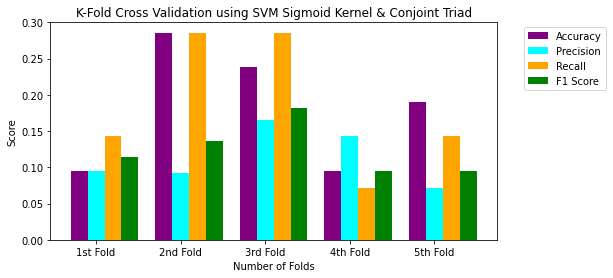

In [113]:
# Visualize evaluation score
fig = plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_accuracy, width=0.2, color='purple', label = 'Accuracy')
plt.bar(x_axis +0.0, fold_precision, width=0.2, color='cyan', label = 'Precision')
plt.bar(x_axis +0.2, fold_recall, width=0.2, color='orange', label = 'Recall')
plt.bar(x_axis +0.4, fold_f1, width=0.2, color='green', label = 'F1 Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using SVM Sigmoid Kernel & Conjoint Triad")
plt.show()

In [114]:
# Predict data test
test = y_test_conj
y_pred = sigmoid_svm.predict(np.array(x_test_conj))
print("Actual:   ", test)
print("Predicted:", y_pred)

Actual:    [3 2 2 5 0 4 1 0 2 3 3 0 5 3 2 6 3 2 1 4 1 1 1 0 2 5 1 6 0 5 0 4 0 2 5]
Predicted: [6 4 4 4 2 2 2 2 4 6 6 2 4 6 4 6 6 4 2 2 2 2 2 2 4 4 2 6 2 4 2 2 2 4 4]


In [115]:
print("Accuracy Score:", accuracy_score(test, y_pred))
print("Precision Score:", precision_score(test, y_pred, average='macro', zero_division=0))
print("Recall Score:", recall_score(test, y_pred, average='macro', zero_division=0))
print("F1 Score:", f1_score(test, y_pred, average='macro', zero_division=0))

Accuracy Score: 0.05714285714285714
Precision Score: 0.04081632653061224
Recall Score: 0.14285714285714285
F1 Score: 0.0634920634920635


In [116]:
from sklearn.metrics import classification_report
print(classification_report(test, y_pred, target_names=target_names, zero_division=0))

                     precision    recall  f1-score   support

   Human Adenovirus       0.00      0.00      0.00         7
           MERS-CoV       0.00      0.00      0.00         6
Parainfluenza virus       0.00      0.00      0.00         7
     Rhinovirus-HRV       0.00      0.00      0.00         5
         SARS-CoV-2       0.00      0.00      0.00         3
   Zaire Ebolavirus       0.00      0.00      0.00         5
         Zika virus       0.29      1.00      0.44         2

           accuracy                           0.06        35
          macro avg       0.04      0.14      0.06        35
       weighted avg       0.02      0.06      0.03        35



# K-Means Clustering

```python
import numpy as np
import random

class KMeans:
    def __init__(self, k=3, max_iterations=100):
        '''
        K-Means clustering algorithm implementation using Euclidean distance.
        
        Parameters:
        -----------
        k : int, optional, default: 3
            The number of clusters.
        max_iterations : int, optional, default: 100
            The maximum number of iterations to run the algorithm.
        '''
        self.k = k
        self.max_iterations = max_iterations
    
    def _compute_distances(self, data):
        # calculate the Euclidean distances
        distances = np.sqrt(((data - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return distances
    
    def fit(self, data):
        '''
        Fit K-Means clustering model to the input data.
        
        Parameters:
        -----------
        data : numpy array of shape (n_samples, n_features)
            The data to be clustered.
        '''
        # Initialize centroids randomly
        self.centroids = data[random.sample(range(data.shape[0]), self.k)]
        
        for i in range(self.max_iterations):
            # Assign labels to each datapoint based on centroids
            distances = self._compute_distances(data)
            self.labels = np.argmin(distances, axis=0)
            
            # Update centroids based on datapoint labels
            for j in range(self.k):
                self.centroids[j] = data[self.labels == j].mean(axis=0)
    
    def predict(self, data):
        '''
        Predict the cluster labels for the input data.
        
        Parameters:
        -----------
        data : numpy array of shape (n_samples, n_features)
            The data to be clustered.
        
        Returns:
        --------
        labels : numpy array of shape (n_samples,)
            The predicted cluster labels for each data point.
        '''
        distances = self._compute_distances(data)
        labels = np.argmin(distances, axis=0)
        return labels
```

In [117]:
n_cluster = len(np.unique(y))
n_cluster

7

<b>Sequence Encoding</b>

In [118]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_cluster, random_state=0)

In [119]:
train = x_train_fold_enc
val = x_val_fold_enc

fold_ri = []
fold_ari = []
fold_silh = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    kmeans.fit(train[fold][0]) # start training
    y_pred = kmeans.predict(val[fold][0])
    fold_ri.append(rand_score(val[fold][1], y_pred))
    fold_ari.append(adjusted_rand_score(val[fold][1], y_pred))
    fold_silh.append(silhouette_score(val[fold][0], y_pred, metric="euclidean")) # measure against x_test
    print(y_pred)
print("Training done!\n")

print("Rand Index score per-fold:", fold_ri)
print("Adjusted Rand Index score per-fold:", fold_ari)
print("Silhouette per-fold:", fold_silh)
print()
print("Overall Rand Index score:", np.array(fold_ri).mean())
print("Overall Adjusted Rand Index score:", np.array(fold_ari).mean())
print("Overall Silhouette score:", np.array(fold_silh).mean())

Training start!
Fold iteration: 0
[0 0 0 2 0 6 3 6 5 3 3 0 2 3 2 6 2 6 2 6 0]
Fold iteration: 1
[0 3 0 6 3 3 6 4 0 3 0 2 5 3 4 5 0 0 3 3 0]
Fold iteration: 2
[6 2 2 0 6 2 2 1 4 0 2 0 2 5 1 2 5 2 6 6 2]
Fold iteration: 3
[3 5 6 4 3 4 0 4 3 6 3 5 6 6 0 3 5 5 6 6 4]
Fold iteration: 4
[3 6 6 6 5 5 5 4 6 1 0 5 6 2 1 4 1 4 4 1 2]
Training done!

Rand Index score per-fold: [0.9619047619047619, 0.8476190476190476, 0.9047619047619048, 0.9714285714285714, 0.9714285714285714]
Adjusted Rand Index score per-fold: [0.8690977092099111, 0.4802784222737819, 0.6769727734194739, 0.8972937724160417, 0.8763978811065333]
Silhouette per-fold: [0.09271382388897294, 0.19004882798790912, 0.08779504436099363, 0.19735962900840626, 0.2582555334891901]

Overall Rand Index score: 0.9314285714285715
Overall Adjusted Rand Index score: 0.7600081116851485
Overall Silhouette score: 0.16523457174709438


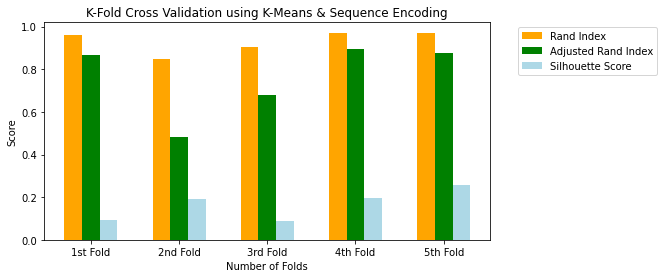

In [120]:
# Visualize evaluation score
fig = plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_ri, width=0.2, color='orange', label = 'Rand Index')
plt.bar(x_axis +0.0, fold_ari, width=0.2, color='green', label = 'Adjusted Rand Index')
plt.bar(x_axis +0.2, fold_silh, width=0.2, color='lightblue', label = 'Silhouette Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using K-Means & Sequence Encoding")
plt.show()

In [121]:
# Predict data test
y_pred = kmeans.predict(np.array(x_test_enc))

In [122]:
# Show cluster results from test data
for cluster_number in range(n_cluster):
    print('cluster: ', cluster_number)
    kmeans_group = np.where(y_pred == cluster_number)
    print(kmeans_group)

cluster:  0
(array([ 1,  2,  8, 14, 17, 24, 33], dtype=int64),)
cluster:  1
(array([ 0,  9, 10, 13, 16], dtype=int64),)
cluster:  2
(array([18, 22, 26], dtype=int64),)
cluster:  3
(array([ 4,  7, 11, 23, 28, 30, 32], dtype=int64),)
cluster:  4
(array([15, 27], dtype=int64),)
cluster:  5
(array([ 3, 12, 25, 29, 34], dtype=int64),)
cluster:  6
(array([ 5,  6, 19, 20, 21, 31], dtype=int64),)


In [123]:
test = y_test_enc
print("Rand-Index Score:", rand_score(test, y_pred))
print("Adjusted Rand-Index Score:", adjusted_rand_score(test, y_pred))
print("Silhouette Score:", silhouette_score(np.array(x_test_enc), y_pred, metric="euclidean"))

Rand-Index Score: 0.9697478991596639
Adjusted Rand-Index Score: 0.8713791612624298
Silhouette Score: 0.15322119829042713


<b>N-mers Frequency</b>

In [124]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_cluster, random_state=0)

In [125]:
train = x_train_fold_nmers
val = x_val_fold_nmers

fold_ri = []
fold_ari = []
fold_silh = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    kmeans.fit(train[fold][0]) # start training
    y_pred = kmeans.predict(val[fold][0])
    fold_ri.append(rand_score(val[fold][1], y_pred))
    fold_ari.append(adjusted_rand_score(val[fold][1], y_pred))
    fold_silh.append(silhouette_score(val[fold][0], y_pred, metric="euclidean")) # measure against x_test
    print(y_pred)
print("Training done!\n")

print("Rand Index score per-fold:", fold_ri)
print("Adjusted Rand Index score per-fold:", fold_ari)
print("Silhouette per-fold:", fold_silh)
print()
print("Overall Rand Index score:", np.array(fold_ri).mean())
print("Overall Adjusted Rand Index score:", np.array(fold_ari).mean())
print("Overall Silhouette score:", np.array(fold_silh).mean())

Training start!
Fold iteration: 0
[4 5 4 6 5 3 2 3 0 2 2 5 6 2 6 3 6 3 6 3 5]
Fold iteration: 1
[6 4 6 1 4 2 1 5 3 4 6 0 2 2 5 2 3 3 2 2 6]
Fold iteration: 2
[3 4 4 1 3 4 4 0 2 1 6 1 6 5 0 6 5 4 3 3 6]
Fold iteration: 3
[6 4 3 0 6 0 5 0 1 3 1 4 3 3 5 6 4 4 3 3 0]
Fold iteration: 4
[2 1 1 1 3 3 3 0 1 5 6 3 4 4 5 0 5 0 0 5 4]
Training done!

Rand Index score per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Adjusted Rand Index score per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Silhouette per-fold: [0.8442241596951584, 0.8504385782544639, 0.8411891717327811, 0.8589904125211111, 0.8326657529601279]

Overall Rand Index score: 1.0
Overall Adjusted Rand Index score: 1.0
Overall Silhouette score: 0.8455016150327284


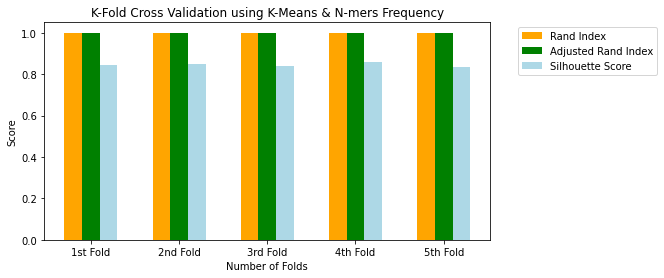

In [126]:
# Visualize evaluation score
fig = plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_ri, width=0.2, color='orange', label = 'Rand Index')
plt.bar(x_axis +0.0, fold_ari, width=0.2, color='green', label = 'Adjusted Rand Index')
plt.bar(x_axis +0.2, fold_silh, width=0.2, color='lightblue', label = 'Silhouette Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using K-Means & N-mers Frequency")
plt.show()

In [127]:
# Predict data test
y_pred = kmeans.predict(np.array(x_test_nmers))

In [128]:
# Show cluster results from test data
for cluster_number in range(n_cluster):
    print('cluster: ', cluster_number)
    kmeans_group = np.where(y_pred == cluster_number)
    print(kmeans_group)

cluster:  0
(array([15, 27], dtype=int64),)
cluster:  1
(array([ 5, 19, 31], dtype=int64),)
cluster:  2
(array([ 4,  7, 11, 23, 28, 30, 32], dtype=int64),)
cluster:  3
(array([ 3, 12, 25, 29, 34], dtype=int64),)
cluster:  4
(array([ 6, 18, 20, 21, 22, 26], dtype=int64),)
cluster:  5
(array([ 0,  9, 10, 13, 16], dtype=int64),)
cluster:  6
(array([ 1,  2,  8, 14, 17, 24, 33], dtype=int64),)


In [129]:
test = y_test_nmers
print("Rand-Index Score:", rand_score(test, y_pred))
print("Adjusted Rand-Index Score:", adjusted_rand_score(test, y_pred))
print("Silhouette Score:", silhouette_score(np.array(x_test_enc), y_pred, metric="euclidean"))

Rand-Index Score: 1.0
Adjusted Rand-Index Score: 1.0
Silhouette Score: 0.11755520447284416


<b>Conjoint Triad</b>

In [130]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_cluster, random_state=0)

In [131]:
train = x_train_fold_conj
val = x_val_fold_conj

fold_ri = []
fold_ari = []
fold_silh = []

print("Training start!")
for fold in range(n_folds):
    # [fold][0] = x, [fold][1] = y
    print(f"Fold iteration: {fold}")
    kmeans.fit(train[fold][0]) # start training
    y_pred = kmeans.predict(val[fold][0])
    fold_ri.append(rand_score(val[fold][1], y_pred))
    fold_ari.append(adjusted_rand_score(val[fold][1], y_pred))
    fold_silh.append(silhouette_score(val[fold][0], y_pred, metric="euclidean")) # measure against x_test
    print(y_pred)
print("Training done!\n")

print("Rand Index score per-fold:", fold_ri)
print("Adjusted Rand Index score per-fold:", fold_ari)
print("Silhouette per-fold:", fold_silh)
print()
print("Overall Rand Index score:", np.array(fold_ri).mean())
print("Overall Adjusted Rand Index score:", np.array(fold_ari).mean())
print("Overall Silhouette score:", np.array(fold_silh).mean())

Training start!
Fold iteration: 0
[3 6 3 2 6 1 0 1 5 0 0 6 2 0 2 1 2 1 2 1 6]
Fold iteration: 1
[1 2 1 6 2 5 6 3 4 2 1 0 5 5 3 5 4 4 5 5 1]
Fold iteration: 2
[5 1 1 2 5 1 1 6 0 2 3 2 3 4 6 3 4 1 5 5 3]
Fold iteration: 3
[4 5 3 0 4 0 6 0 1 3 1 5 3 3 6 4 5 5 3 3 0]
Fold iteration: 4
[2 1 1 1 6 6 6 0 1 5 3 6 4 4 5 0 5 0 0 5 4]
Training done!

Rand Index score per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Adjusted Rand Index score per-fold: [1.0, 1.0, 1.0, 1.0, 1.0]
Silhouette per-fold: [0.771382856545768, 0.770259438966614, 0.7672165202007231, 0.737550491553164, 0.7831742571672438]

Overall Rand Index score: 1.0
Overall Adjusted Rand Index score: 1.0
Overall Silhouette score: 0.7659167128867026


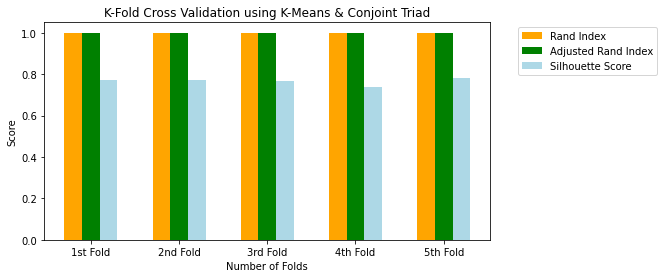

In [132]:
# Visualize evaluation score
fig = plt.figure(figsize = (8, 4))
plt_labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
x_axis = np.arange(len(plt_labels))
plt.bar(x_axis -0.2, fold_ri, width=0.2, color='orange', label = 'Rand Index')
plt.bar(x_axis +0.0, fold_ari, width=0.2, color='green', label = 'Adjusted Rand Index')
plt.bar(x_axis +0.2, fold_silh, width=0.2, color='lightblue', label = 'Silhouette Score')
plt.xticks(x_axis, plt_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Number of Folds")
plt.ylabel("Score")
plt.title("K-Fold Cross Validation using K-Means & Conjoint Triad")
plt.show()

In [133]:
# Predict data test
y_pred = kmeans.predict(np.array(x_test_conj))

In [134]:
# Show cluster results from test data
for cluster_number in range(n_cluster):
    print('cluster: ', cluster_number)
    kmeans_group = np.where(y_pred == cluster_number)
    print(kmeans_group)

cluster:  0
(array([15, 27], dtype=int64),)
cluster:  1
(array([ 5, 19, 31], dtype=int64),)
cluster:  2
(array([ 4,  7, 11, 23, 28, 30, 32], dtype=int64),)
cluster:  3
(array([ 1,  2,  8, 14, 17, 24, 33], dtype=int64),)
cluster:  4
(array([ 6, 18, 20, 21, 22, 26], dtype=int64),)
cluster:  5
(array([ 0,  9, 10, 13, 16], dtype=int64),)
cluster:  6
(array([ 3, 12, 25, 29, 34], dtype=int64),)


In [135]:
test = y_test_conj
print("Rand-Index Score:", rand_score(test, y_pred))
print("Adjusted Rand-Index Score:", adjusted_rand_score(test, y_pred))
print("Silhouette Score:", silhouette_score(np.array(x_test_enc), y_pred, metric="euclidean"))

Rand-Index Score: 1.0
Adjusted Rand-Index Score: 1.0
Silhouette Score: 0.11755520447284416
